**Author: [Sudhanshu Singh](https://github.com/sudhanshusinghaiml "Github Profile")**

<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            <center>Project - Predictive Modelling</center>
        </span>
    </font>
</h2>

<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            I. Jupyter Notebook General Settings:
        </span>
    </font>
</h2>

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            A. Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# For splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

# statsmodels for Linear Regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For LDA - Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# For CART - Classification And Regression Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# For Classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

# For Heteroscedasticity test
import statsmodels.stats.api as sms

# For QQ Plot - Assumption for Linear Regression
import pylab
import scipy.stats as stats

# For testing of homoscedastic or hetroscedasticity in Linear Regression
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# For Autocorrelation of the Residuals in Linear Regression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson

<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            B. Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            C. Adjust Jupyer Settings for Better Views:
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',2000)
pd.set_option('display.max_info_columns',200)
pd.options.display.float_format='{:.2f}'.format

Problem 1 - Linear Regression:
--------------------------------------------

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

DATA DICTIONARY:
---------------------------
System measures used:
9371
lread - Reads (transfers per second ) between system memory and user memory  
lwrite - writes (transfers per second) between system memory and user memory  
scall - Number of system calls of all types per second  
sread - Number of system read calls per second .  
swrite - Number of system write calls per second .  
fork - Number of system fork calls per second.  
exec - Number of system exec calls per second.  
rchar - Number of characters transferred per second by system read calls  
wchar - Number of characters transfreed per second by system write calls  
pgout - Number of page out requests per second  
ppgout - Number of pages, paged out per second  
pgfree - Number of pages per second placed on the free list.  
pgscan - Number of pages checked if they can be freed per second  
atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second  
pgin - Number of page-in requests per second  
ppgin - Number of pages paged in per second  
pflt - Number of page faults caused by protection errors (copy-on-writes).  
vflt - Number of page faults caused by address translation .  
runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.  
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)  
freemem - Number of memory pages available to user processes  
freeswap - Number of disk blocks available for page swapping.  
usr - Portion of time (%) that cpus run in user mode.  

<a id="data"></a>
<h2>
    <font size="3" color = black >
        <span style='font-family:Georgia'>
            <div style='text-align: justify;'>
                1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.
            </div>
        </span>
    </font>
</h2>

<a id="input"></a>
<h3 name='subheading'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.1 Importing the Data of Provided Dataset
            </span>   
        </font>    
</h3>

In [4]:
user_data = pd.read_excel('compactiv.xlsx')

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.2  Displaying the first 5 and last 5 records
            </span>   
        </font>    
</h3>

In [5]:
user_data.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  ppgout  pgfree  pgscan  atch  pgin  ppgin   pflt   vflt         runqsz  freemem  freeswap  usr
0      1       0   2147     79      68  0.20  0.20 40671.00 53995.00   0.00    0.00    0.00    0.00  0.00  1.60   2.60  16.00  26.40      CPU_Bound     4670   1730946   95
1      0       0    170     18      21  0.20  0.20   448.00  8385.00   0.00    0.00    0.00    0.00  0.00  0.00   0.00  15.63  16.83  Not_CPU_Bound     7278   1869002   97
2     15       3   2162    159     119  2.00  2.40      NaN 31950.00   0.00    0.00    0.00    0.00  1.20  6.00   9.40 150.20 220.20  Not_CPU_Bound      702   1021237   87
3      0       0    160     12      16  0.20  0.20      NaN  8670.00   0.00    0.00    0.00    0.00  0.00  0.20   0.20  15.60  16.80  Not_CPU_Bound     7248   1863704   98
4      5       1    330     39      38  0.40  0.40      NaN 12185.00   0.00    0.00    0.00    0.00  0.00  1.00   1.20  37.80  47.60  Not_CPU_Bound      633   1760253   90

In [6]:
user_data.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  ppgout  pgfree  pgscan  atch  pgin  ppgin   pflt   vflt         runqsz  freemem  freeswap  usr
8187     16      12   3009    360     244  1.60  5.81 405250.00 85282.00   8.02   20.64   43.69   55.11  0.60 35.87  47.90 139.28 270.74      CPU_Bound      387    986647   80
8188      4       0   1596    170     146  2.40  1.80  89489.00 41764.00   3.80    4.80    4.80    0.20  0.80  3.80   4.40 122.40 212.60  Not_CPU_Bound      263   1055742   90
8189     16       5   3116    289     190  0.60  0.60 325948.00 52640.00   0.40    0.60    0.60    0.00  0.40 28.40  45.20  60.20 219.80  Not_CPU_Bound      400    969106   87
8190     32      45   5180    254     179  1.20  1.20  62571.00 29505.00   1.40    1.60   13.03   18.04  0.40 23.05  24.25  93.19 202.81      CPU_Bound      141   1022458   83
8191      2       0    985     55      46  1.60  4.80 111111.00 22256.00   0.00    0.00    0.00    0.00  0.20  3.40   6.20  91.80 110.00      CPU_Bound      659   1756514   94

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.3  Checking the shape, size and information of data using dataset
            </span>   
        </font>    
</h3>

In [7]:
# Database dimension
print("Dataset dimension - usage_data                          :",user_data.shape)

#Database size
print("Dataset size - usage_data                               :",user_data.size)

Dataset dimension - usage_data                          : (8192, 22)
Dataset size - usage_data                               : 180224


In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.4  Checking the null values in the dataset provided
            </span>   
        </font>    
</h3>

In [9]:
user_data.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [10]:
missing_values=pd.DataFrame(user_data.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / user_data.shape[0] * 100.00,2)
missing_values

Features  Missing count  % missing
0      lread              0       0.00
1     lwrite              0       0.00
2      scall              0       0.00
3      sread              0       0.00
4     swrite              0       0.00
5       fork              0       0.00
6       exec              0       0.00
7      rchar            104       1.27
8      wchar             15       0.18
9      pgout              0       0.00
10    ppgout              0       0.00
11    pgfree              0       0.00
12    pgscan              0       0.00
13      atch              0       0.00
14      pgin              0       0.00
15     ppgin              0       0.00
16      pflt              0       0.00
17      vflt              0       0.00
18    runqsz              0       0.00
19   freemem              0       0.00
20  freeswap              0       0.00
21       usr              0       0.00

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.5  Checking the summary of data in the dataset provided
            </span>   
        </font>    
</h3>

In [11]:
user_data.describe().T

count       mean       std     min        25%        50%        75%        max
lread    8192.00      19.56     53.35    0.00       2.00       7.00      20.00    1845.00
lwrite   8192.00      13.11     29.89    0.00       0.00       1.00      10.00     575.00
scall    8192.00    2306.32   1633.62  109.00    1012.00    2051.50    3317.25   12493.00
sread    8192.00     210.48    198.98    6.00      86.00     166.00     279.00    5318.00
swrite   8192.00     150.06    160.48    7.00      63.00     117.00     185.00    5456.00
fork     8192.00       1.88      2.48    0.00       0.40       0.80       2.20      20.12
exec     8192.00       2.79      5.21    0.00       0.20       1.20       2.80      59.56
rchar    8088.00  197385.73 239837.49  278.00   34091.50  125473.50  267828.75 2526649.00
wchar    8177.00   95902.99 140841.71 1498.00   22916.00   46619.00  106101.00 1801623.00
pgout    8192.00       2.29      5.31    0.00       0.00       0.00       2.40      81.44
ppgout   8192.00       5.98     15.21    0.00       0.00       0.00       4.20     184.20
pgfree   8192.00      11.92     32.36    0.00       0.00       0.00       5.00     523.00
pgscan   8192.00      21.53     71.14    0.00       0.00       0.00       0.00    1237.00
atch     8192.00       1.13      5.71    0.00       0.00       0.00       0.60     211.58
pgin     8192.00       8.28     13.87    0.00       0.60       2.80       9.77     141.20
ppgin    8192.00      12.39     22.28    0.00       0.60       3.80      13.80     292.61
pflt     8192.00     109.79    114.42    0.00      25.00      63.80     159.60     899.80
vflt     8192.00     185.32    191.00    0.20      45.40     120.40     251.80    1365.00
freemem  8192.00    1763.46   2482.10   55.00     231.00     579.00    2002.25   12027.00
freeswap 8192.00 1328125.96 422019.43    2.00 1042623.50 1289289.50 1730379.50 2243187.00
usr      8192.00      83.97     18.40    0.00      81.00      89.00      94.00      99.00

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.6  Checking all the unique values in the dataset
            </span>   
        </font>    
</h3>

In [12]:
user_data.nunique()

lread        235
lwrite       189
scall       4115
sread        794
swrite       640
fork         228
exec         386
rchar       7898
wchar       7925
pgout        404
ppgout       774
pgfree      1070
pgscan      1202
atch         253
pgin         832
ppgin       1072
pflt        2987
vflt        3799
runqsz         2
freemem     3165
freeswap    7658
usr           56
dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <ul>
            <font size="3" color = DarkBlue >
            <li>Data has been loaded to pandas from compactiv.xlsx file</li>
            <li>Records loaded in the dataframe has been shown using pandas heads and tails methods</li>
            <li>The shape of dataset is - 8192 x 22. It contains 8192 rows and 22 columns</li>
            <li>The size of the dataset is - 180224 </li>
            <li>There are total 22 features - 13 features with dtype as float, 8 features as dtype of int and 1 feature of dtype as Object</li>
            <li>Datatype of all the fields are updated correctly. And there is no abnormal data for features that has been loaded. For ex - When certain features are numric in nature but due to presence of invalid character('?'), the datatype is updated to object. Couldn't find any such issues in any of the features of the dataset</li>
                <li>There are few missing values in the datasets- 104 rows in rchar and 15 rows in wchar</li>
                <li>From the data summary, we could make following observation</li>
            <ul>
                <li>There are features whose minimum values are ZERO. This is possible but we need to identify the proportion of zeros in each of the filed to decide if the ZEROs in the features are genuine or can be considered missing values.</li>
                <li> Features with minimum values as ZEROs are - lread, lwrite, fork, exec, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, and pflt</li>
                <li>Out of all features with minumum values as ZERO, SIX features have 25% of values as ZERO. These features are lwrite, pgout, ppgout, pgfree, pgscan, and atch. This is could be because of various reason, we need to analyze the data before treating it.</li>
                <li>Out of all the SIX features, FIVE features have 50% of the values as ZERO. These features are - pgout, ppgout, pgfree, pgscan, and atch </li>
                <li>And out of these 5 features, ONE feature (pgscan) has 75% of the values as ZERO. We can analyze the data and remove this feature from our model, if needed</li>
                <li>For almost all the features data looks to be skewed and definite presence of outlier except for freeswap</li>
                <li>For Features such as - lread, lwrite, scall, sread, swrite, fork, exec, rchar, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, vflt, and freemem - mean and median value is very far from each other. And median and max values are highly separated for all these features indicating the presence of outliers.</li>
                <li>All these statistical information hints that there is presence of outlier in the above mentioned variables.
            We will do boxplot to get further information about outlier.</li>
            </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.7  Univariate Analysis
            </span>   
        </font>    
</h3>

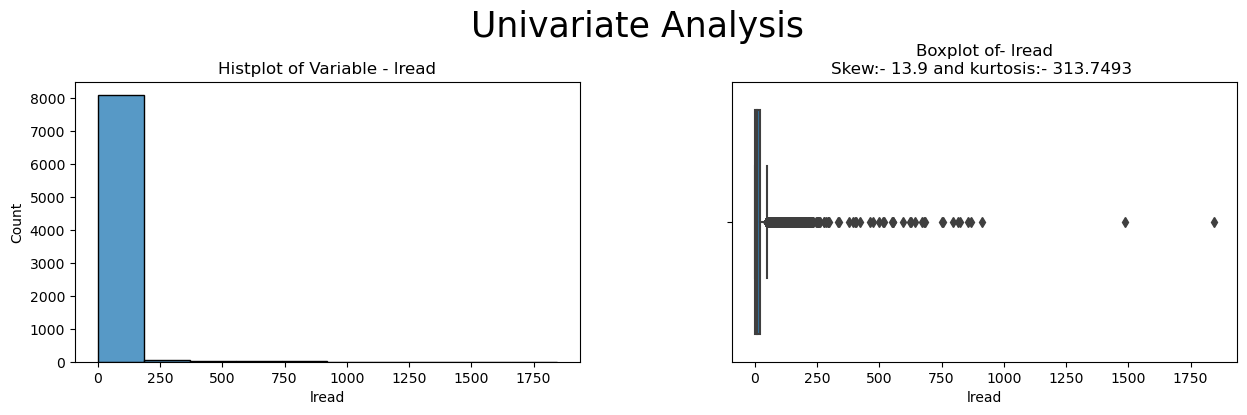

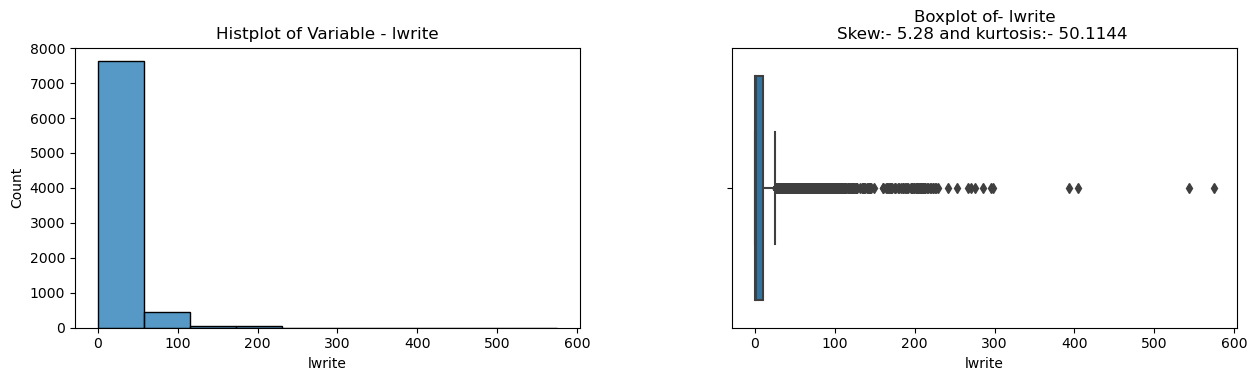

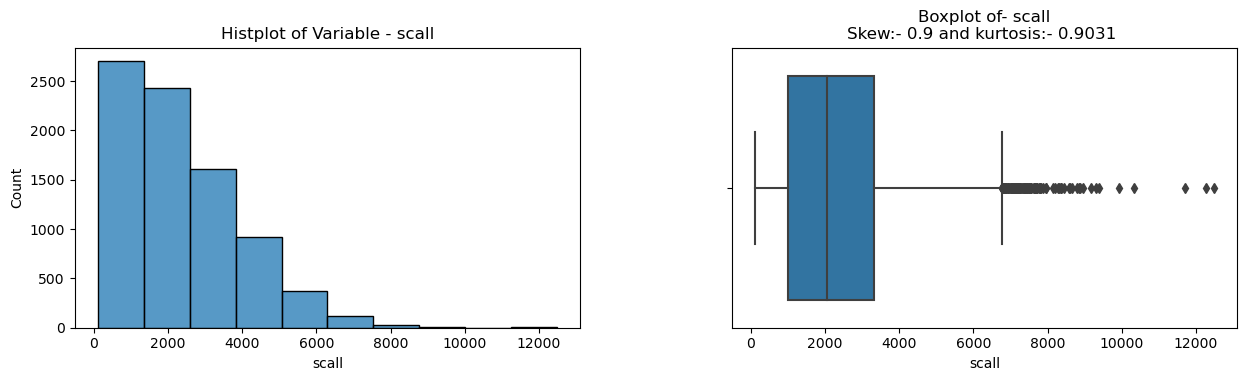

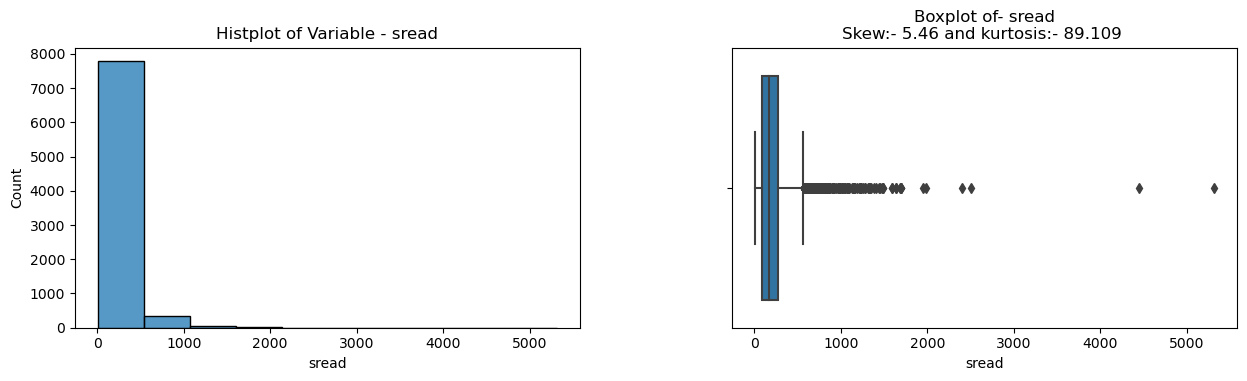

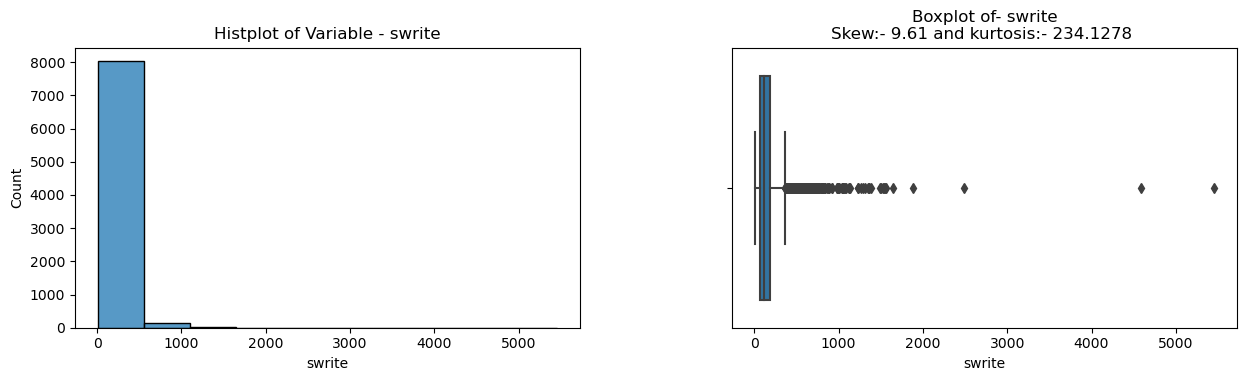

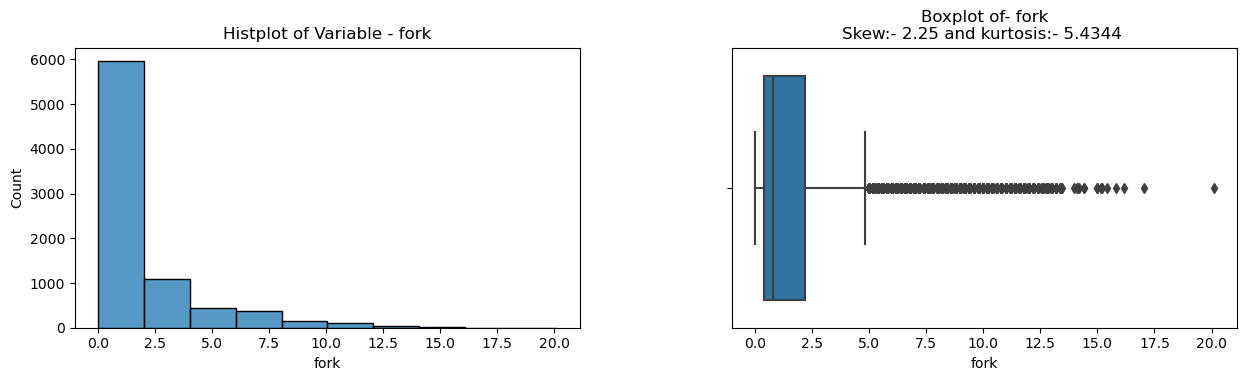

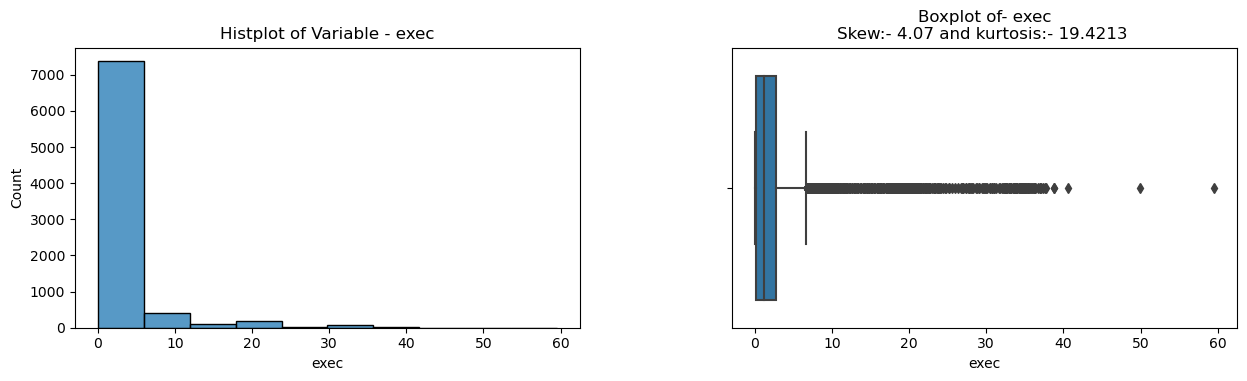

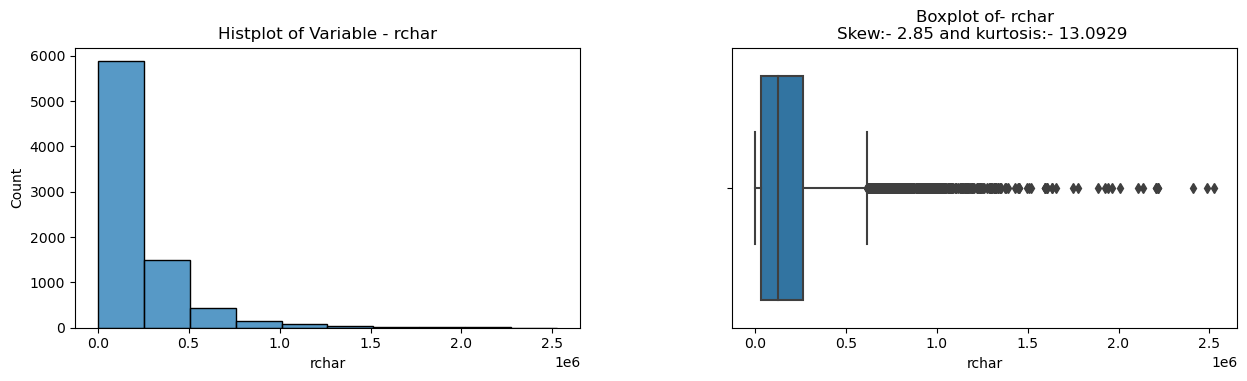

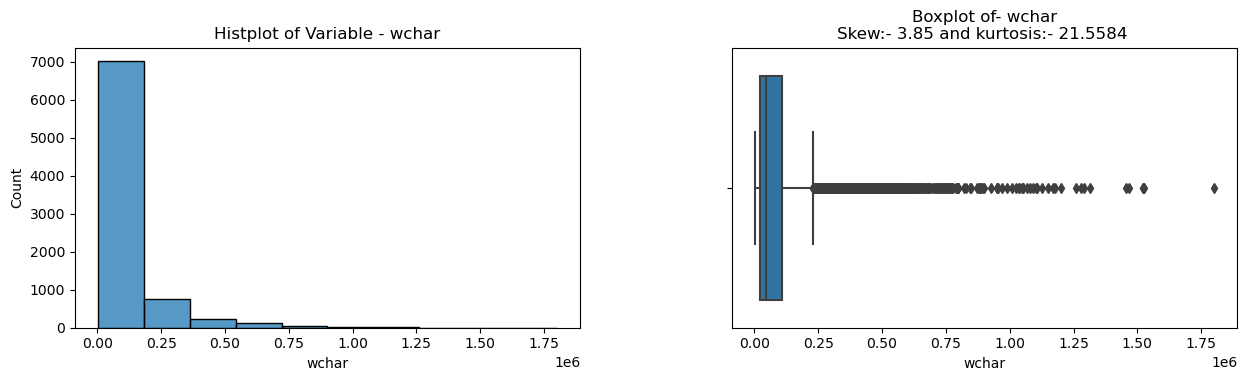

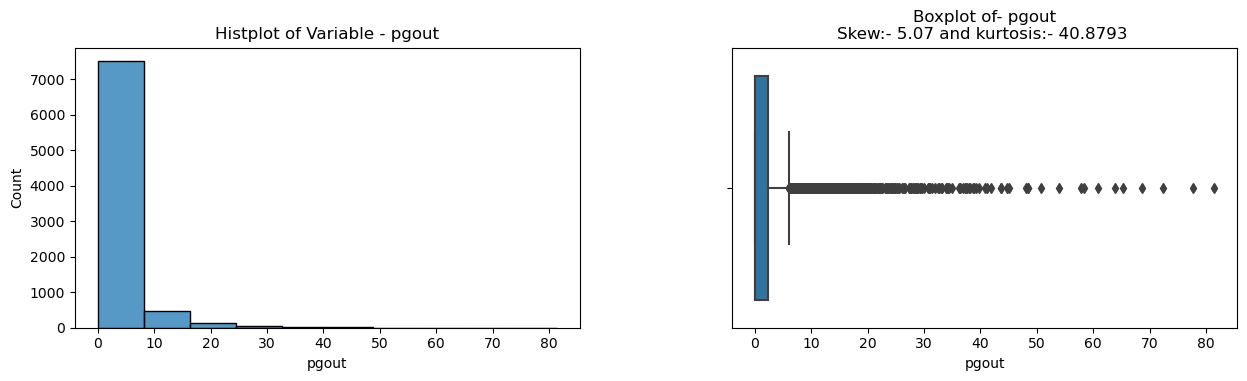

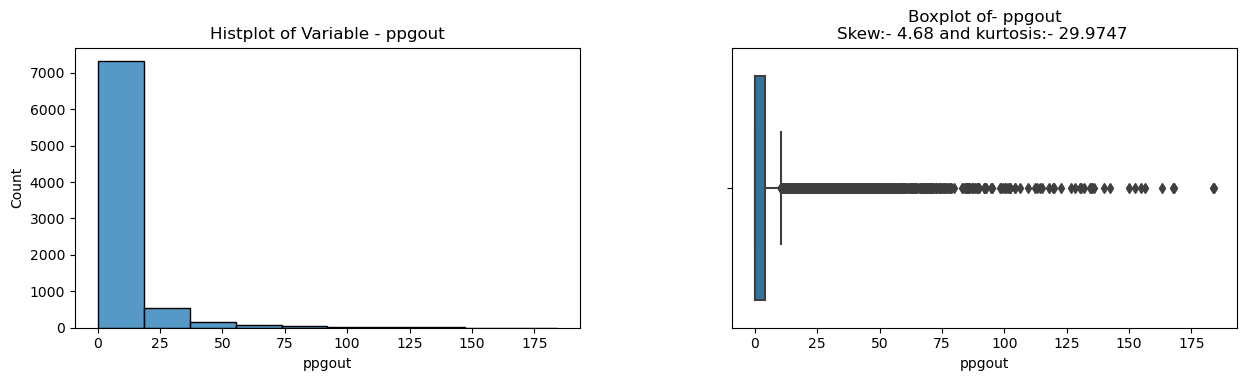

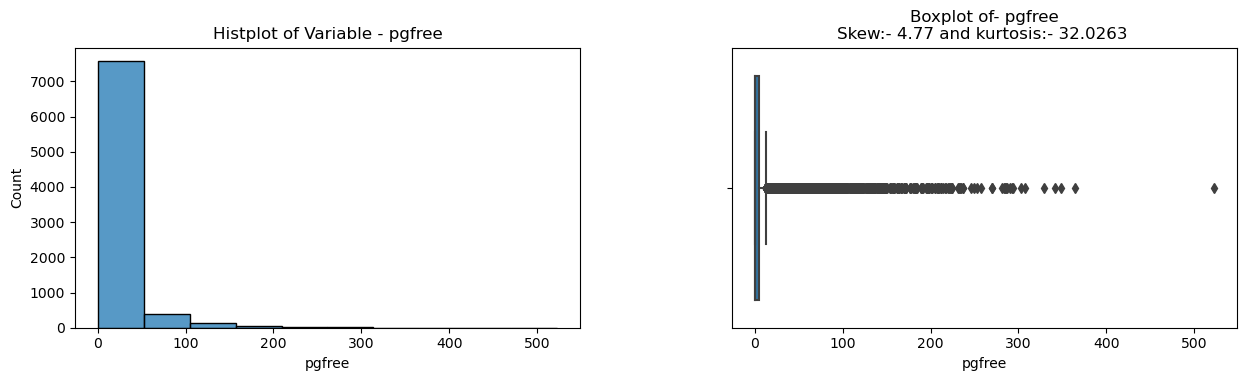

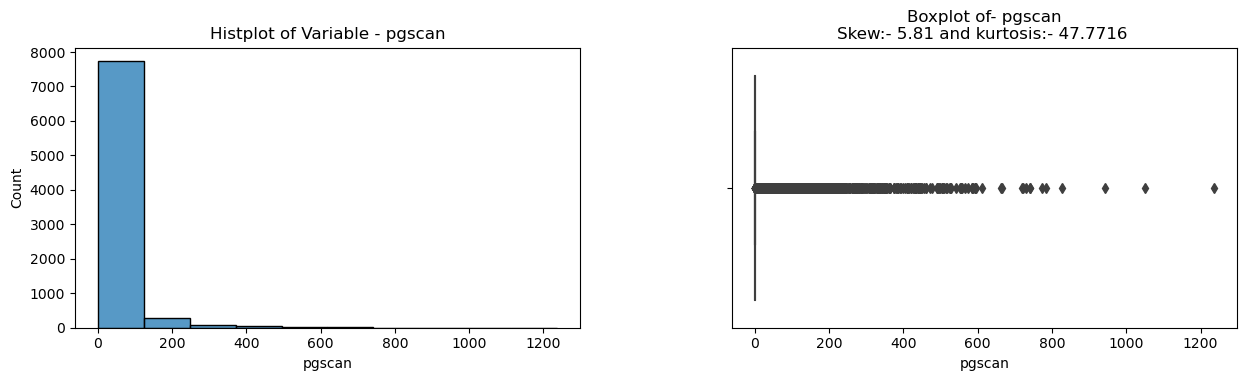

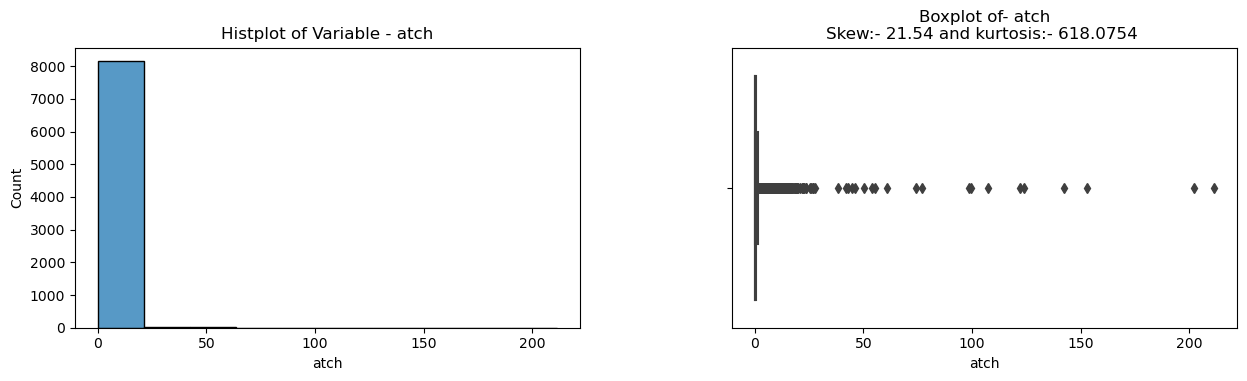

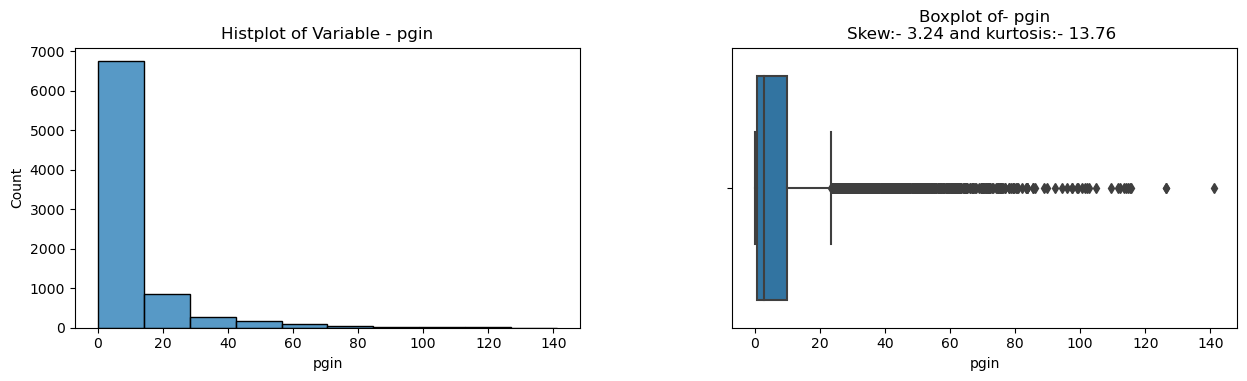

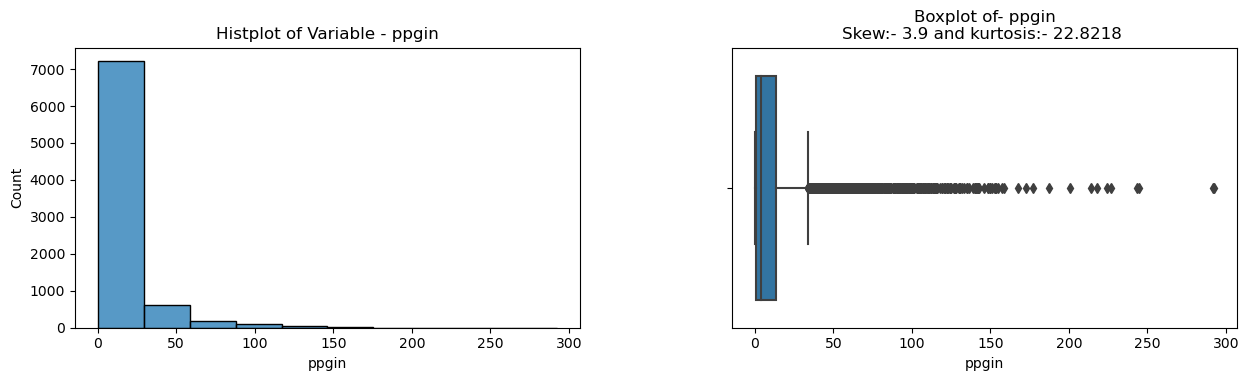

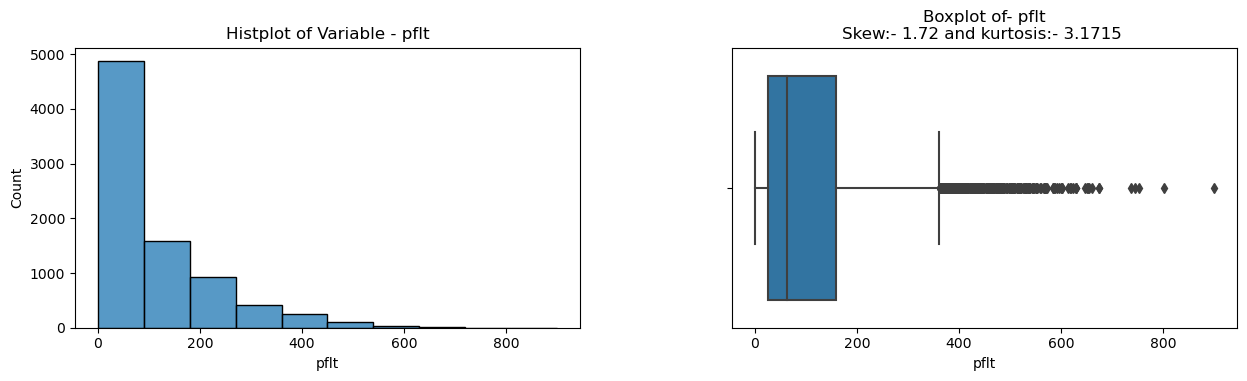

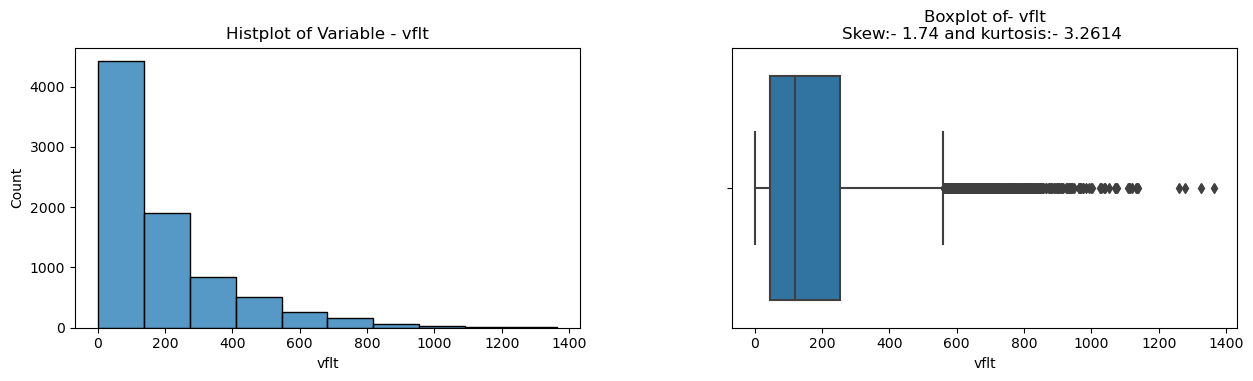

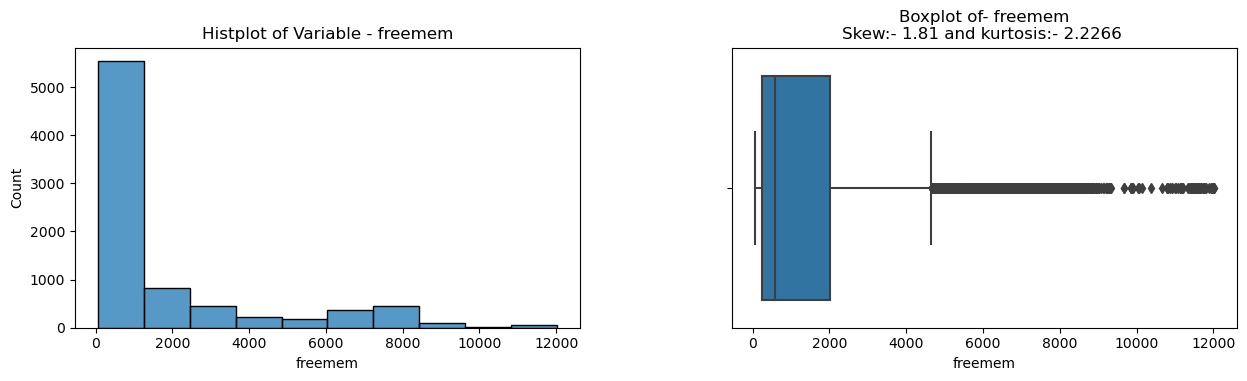

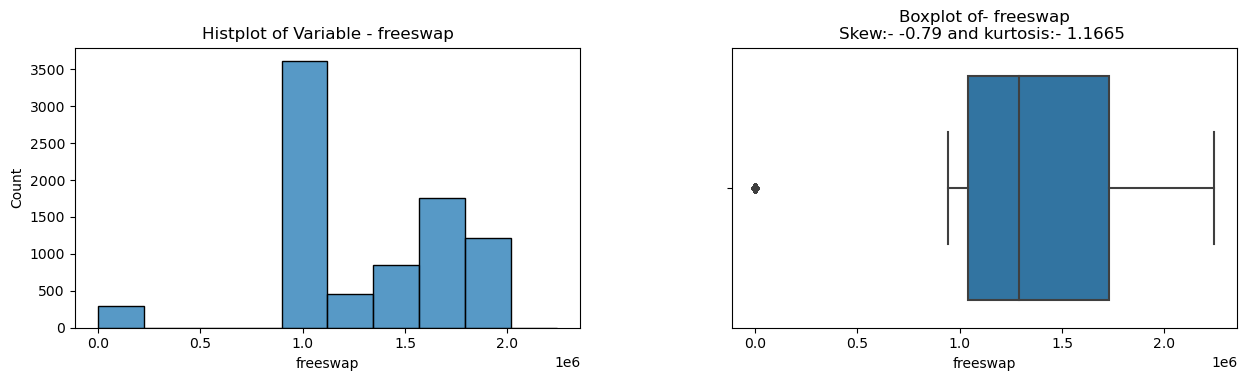

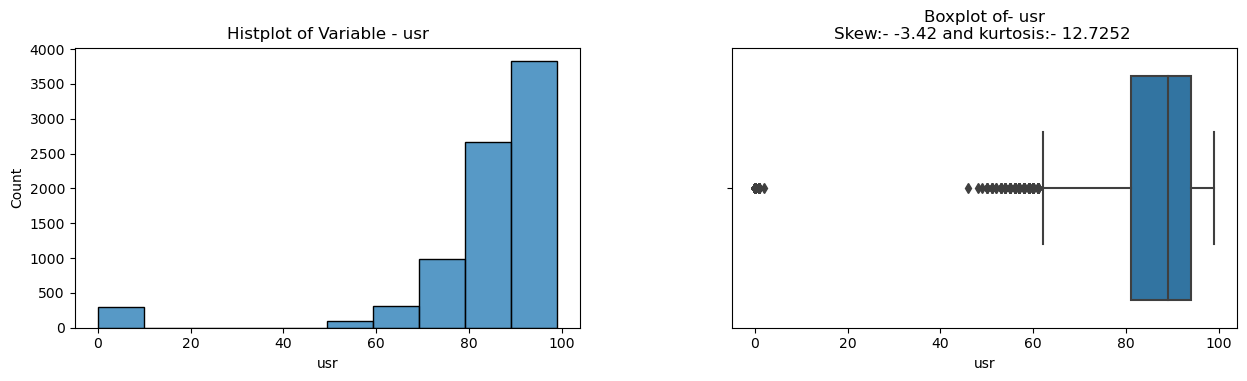

In [13]:
for col in user_data.select_dtypes(include=['float64','int64']).columns:
    fig = plt.figure(figsize=(15,4))
    fig.subplots_adjust(hspace=0.5, top=0.8, wspace= 0.3, bottom = 0.1)
    fig.tight_layout()
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)  
    sns.histplot(x=user_data[col], bins=10, ax=ax1)
    ax1.title.set_text(f'Histplot of Variable - {col}')  
    sns.boxplot(x=user_data[col], ax = ax2)
    ax2.title.set_text(f'Boxplot of- {col}\nSkew:- {round(user_data[col].skew(),2)} and kurtosis:- {round(user_data[col].kurtosis(),4)} ')
    if col =='lread':
        plt.suptitle('Univariate Analysis', fontsize=25)
    plt.show()

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1.8  Bivariate Analysis and Multivariate Analysis
            </span>   
        </font>    
</h3>

<Figure size 3000x3000 with 0 Axes>

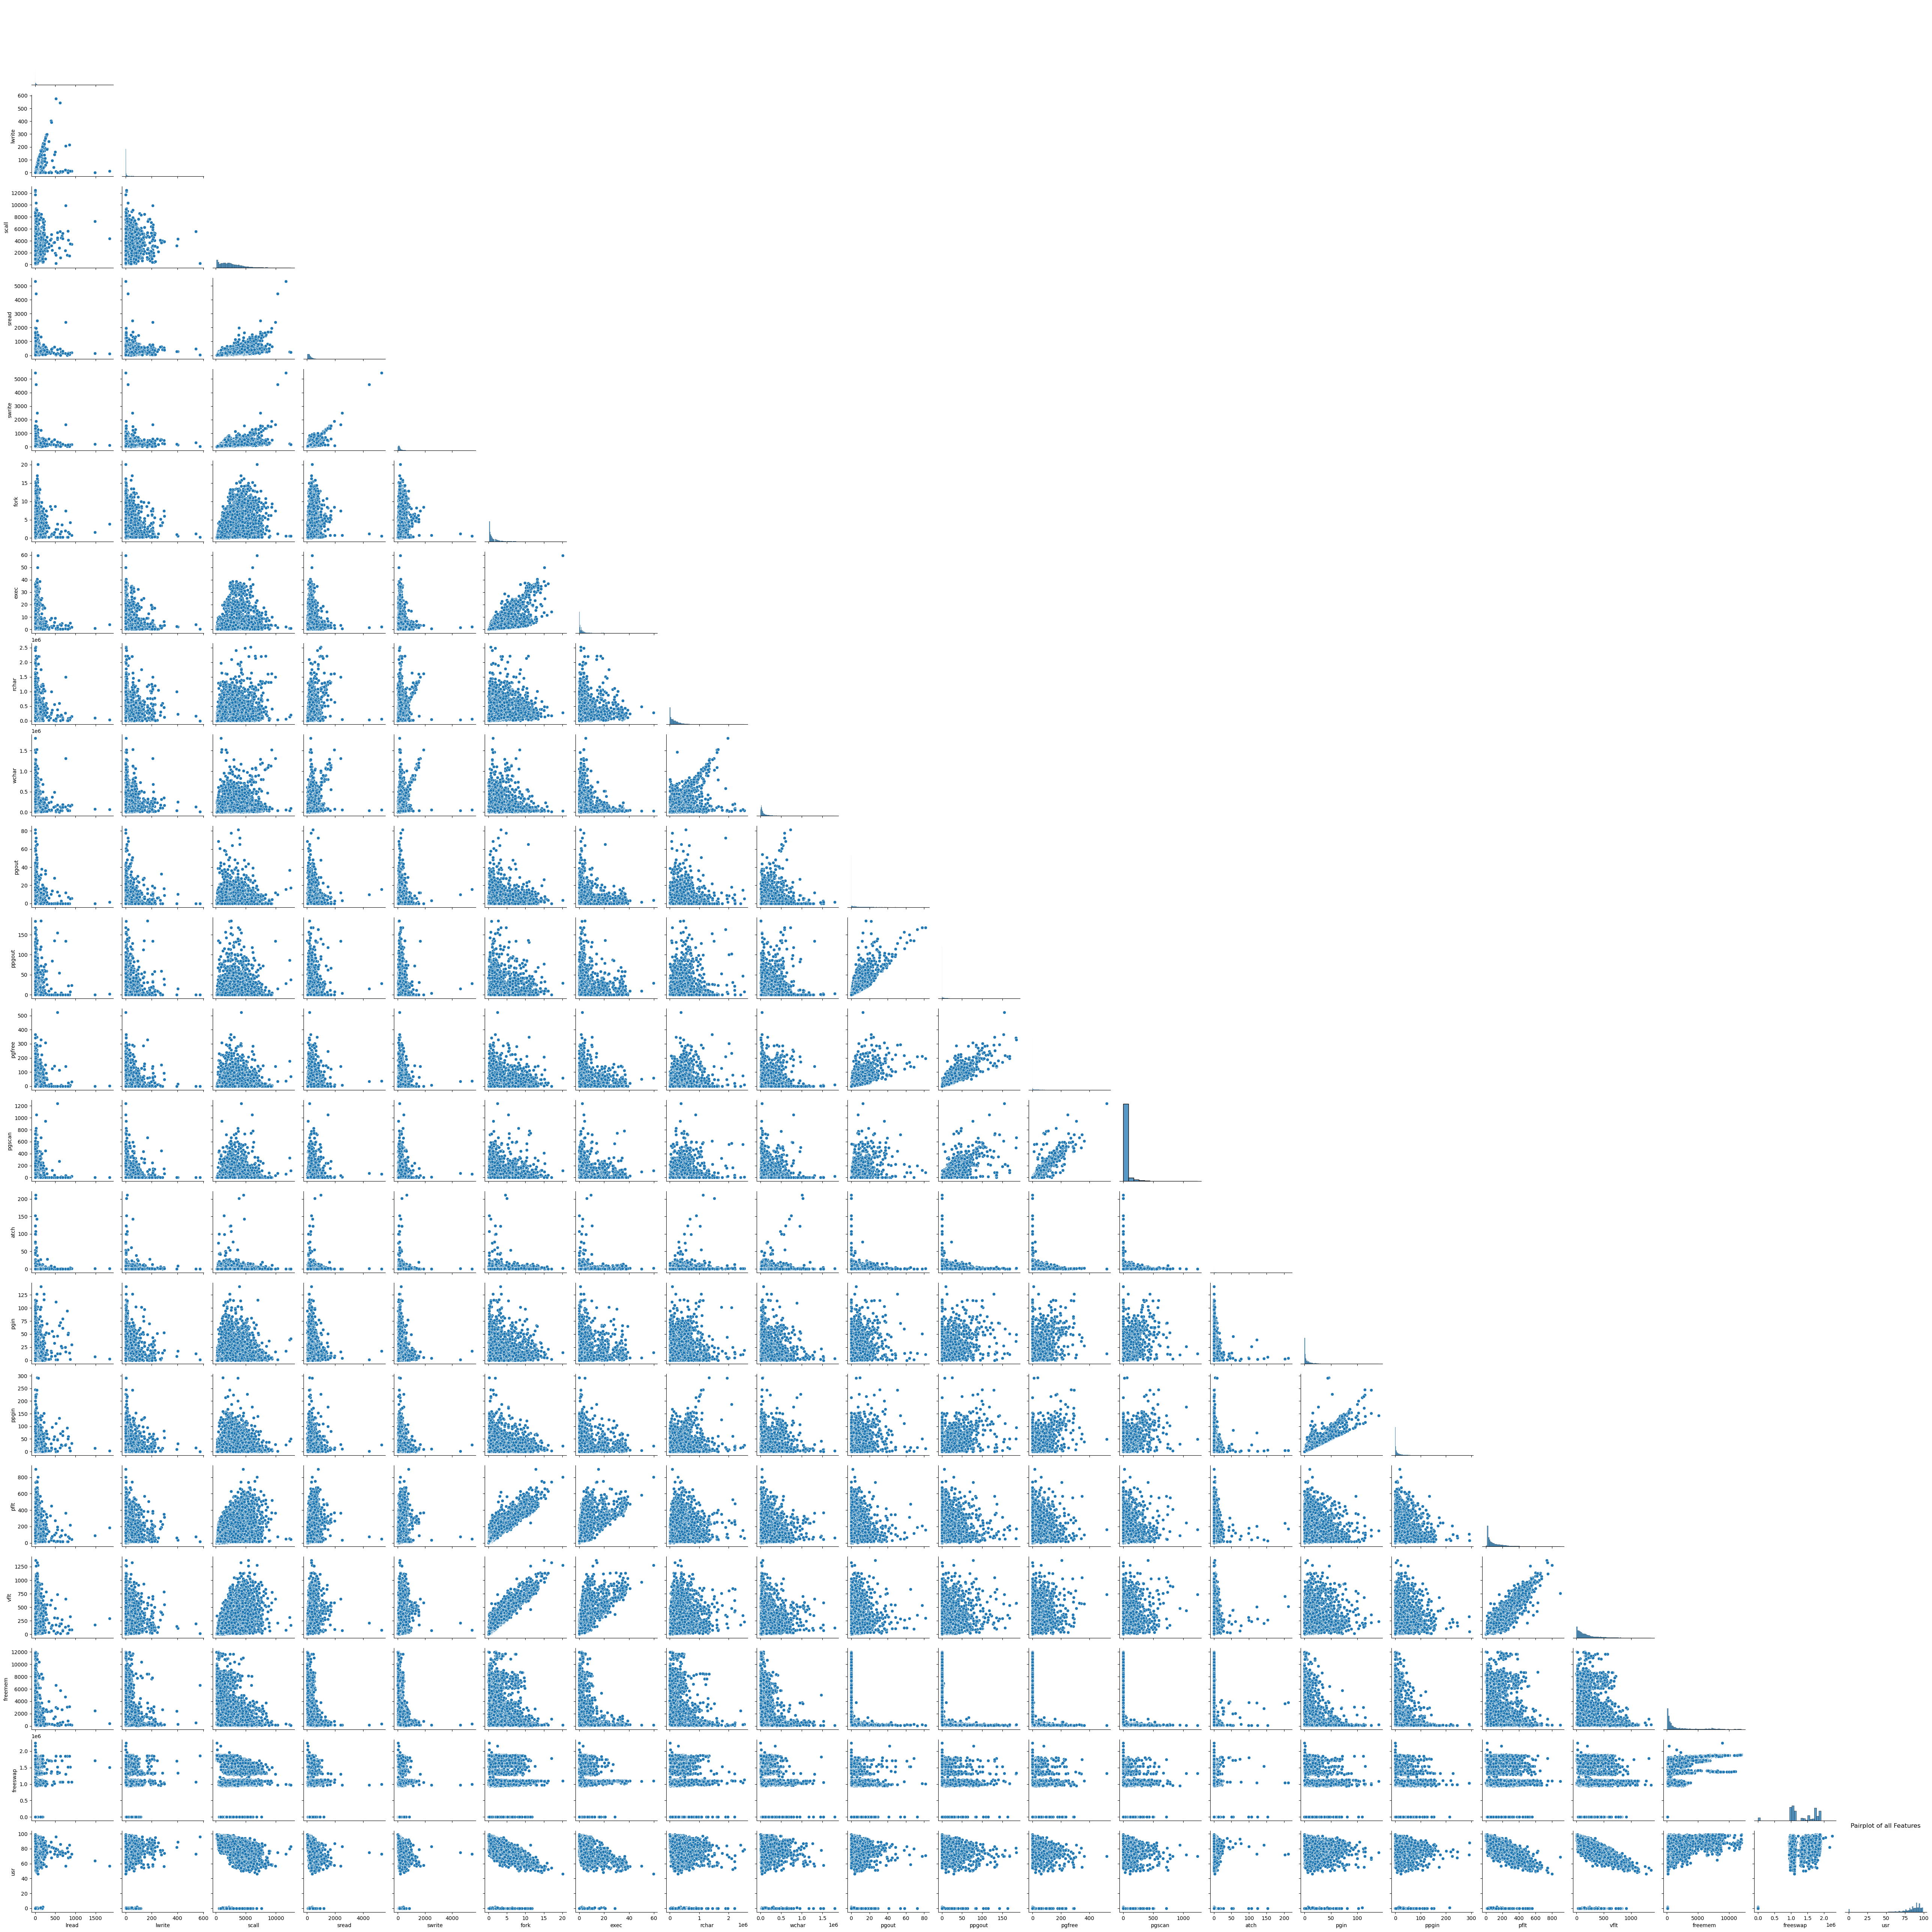

In [14]:
plt.figure(figsize=(30,30))
sns.pairplot(user_data, corner=True);
plt.title("Pairplot of all Features")
plt.show()

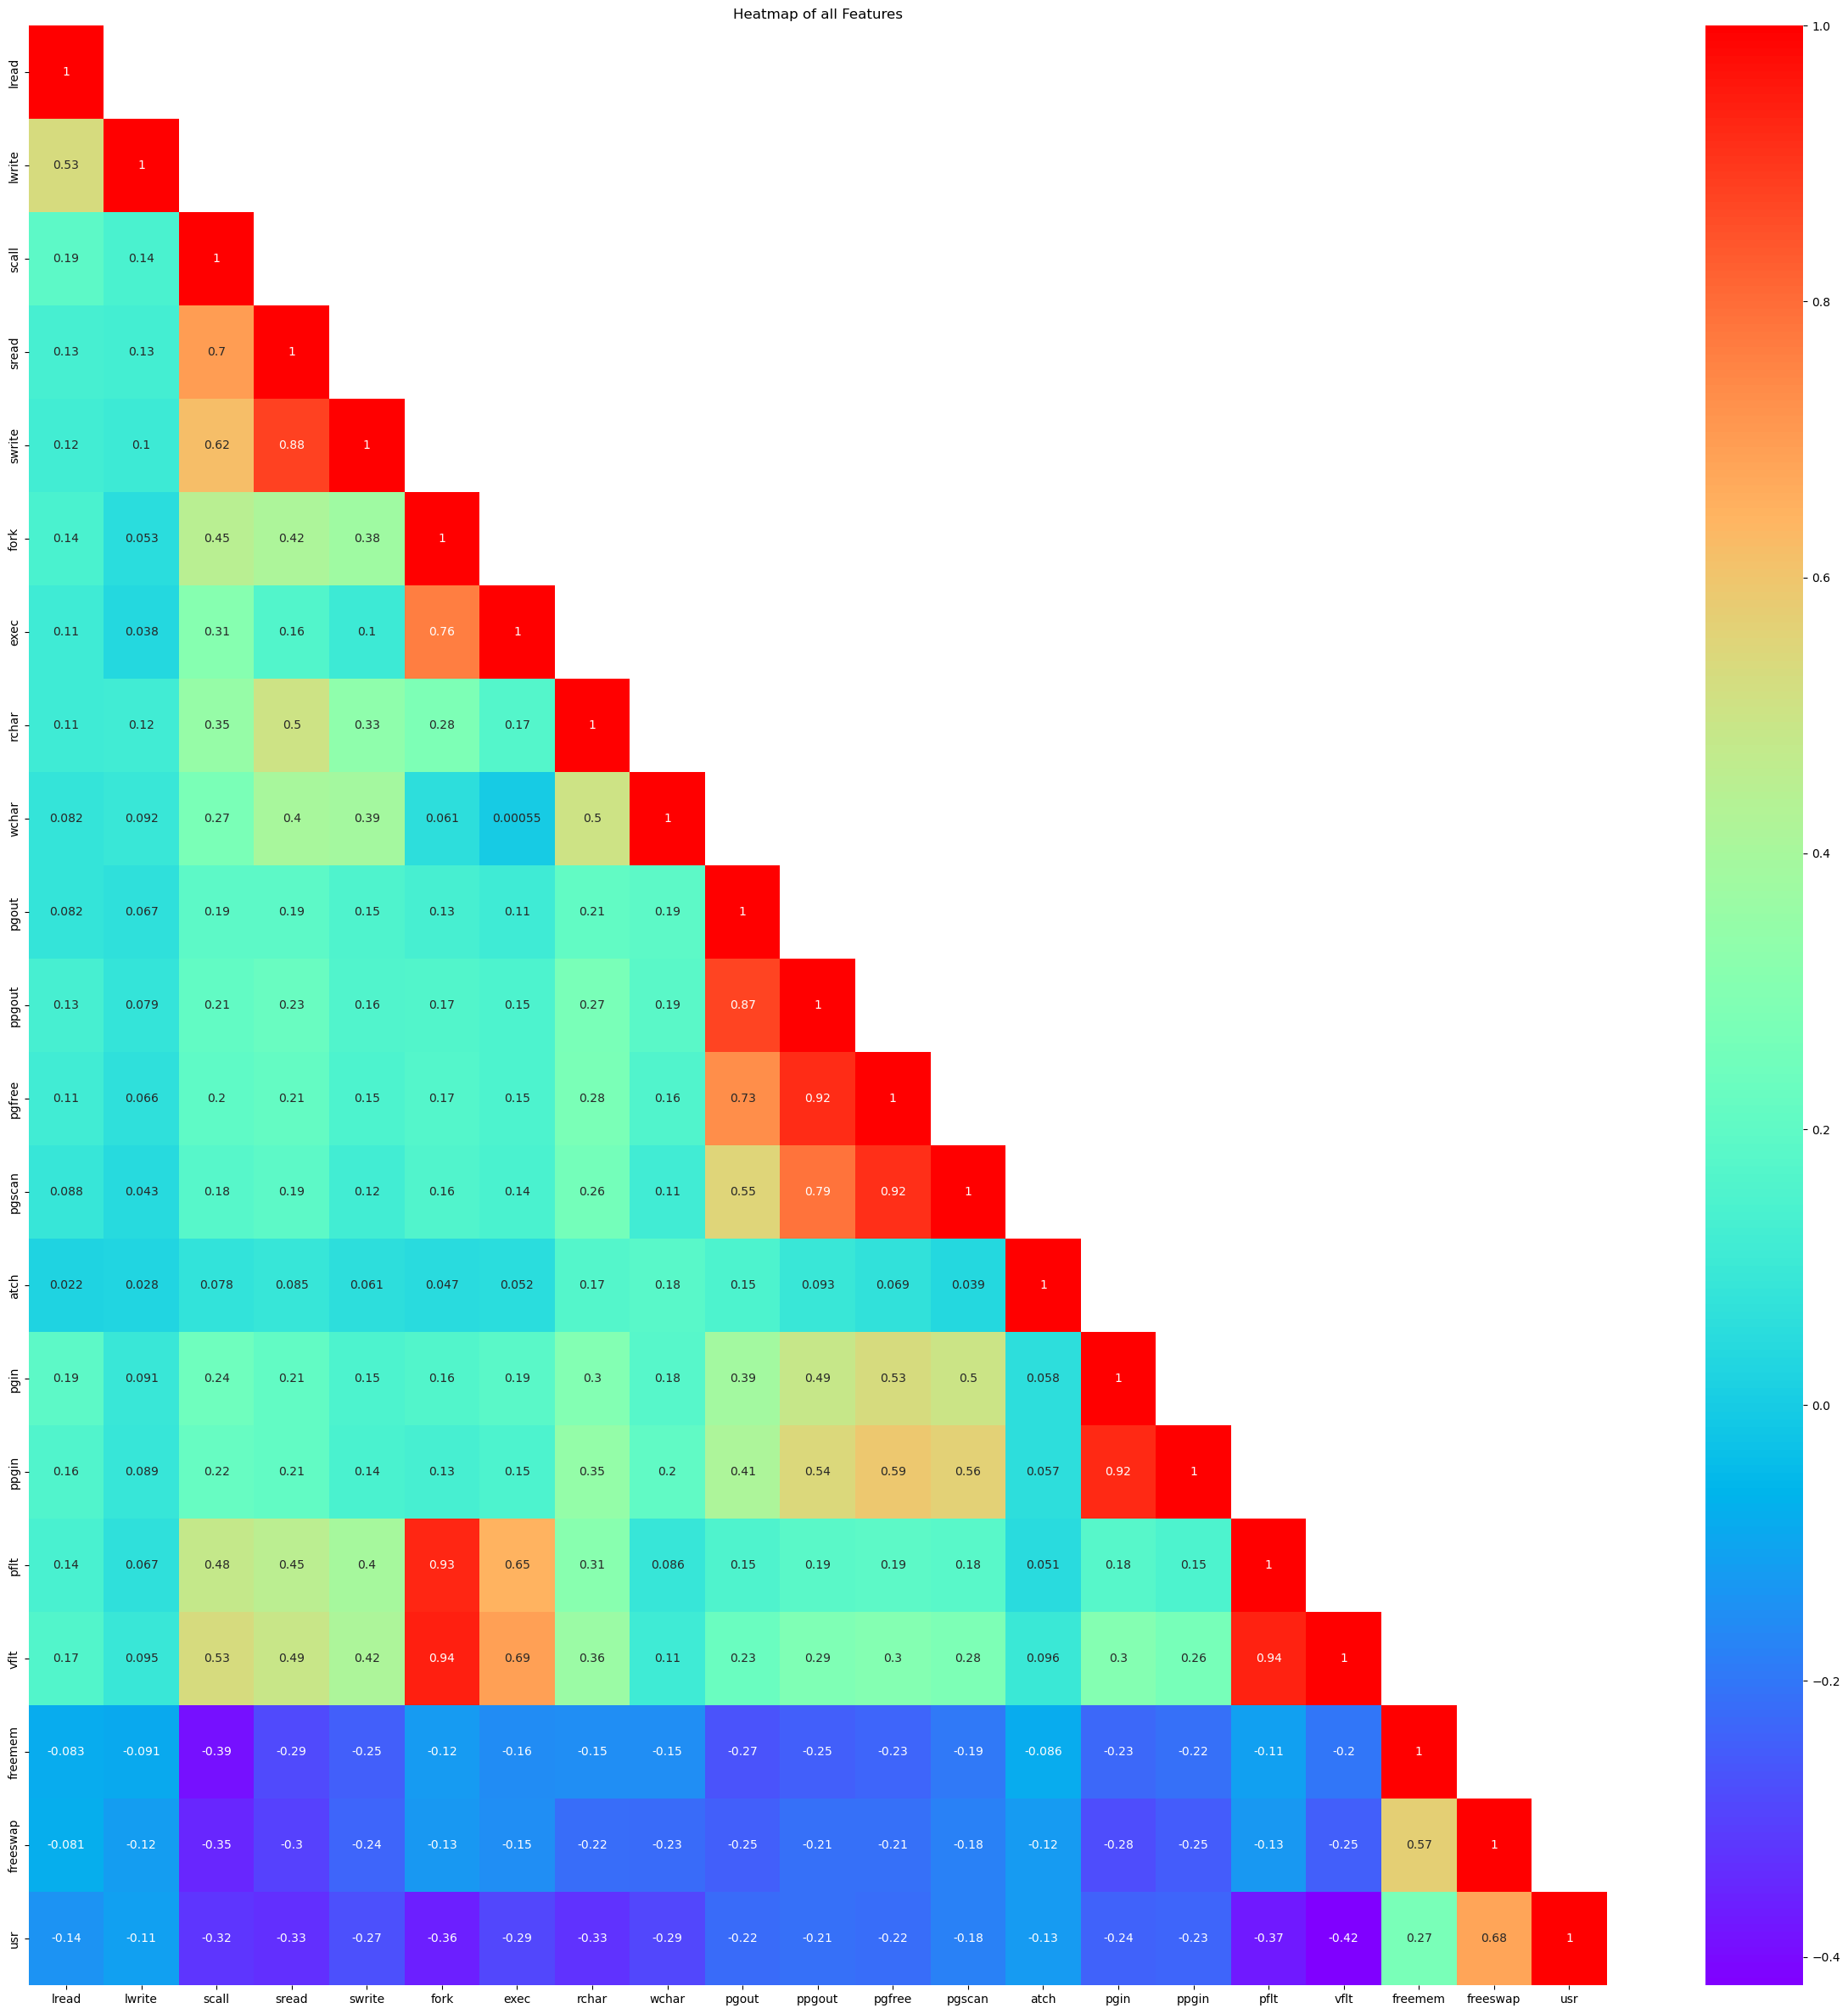

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(user_data.corr(), annot=True, cmap='rainbow', mask = np.triu(user_data.corr(),+1));
plt.title("Heatmap of all Features");
plt.show();

In [16]:
# Tables to understand the correlation of among different features in the dataset 
user_data.corr()

lread  lwrite  scall  sread  swrite  fork  exec  rchar  wchar  pgout  ppgout  pgfree  pgscan  atch  pgin  ppgin  pflt  vflt  freemem  freeswap   usr
lread      1.00    0.53   0.19   0.13    0.12  0.14  0.11   0.11   0.08   0.08    0.13    0.11    0.09  0.02  0.19   0.16  0.14  0.17    -0.08     -0.08 -0.14
lwrite     0.53    1.00   0.14   0.13    0.10  0.05  0.04   0.12   0.09   0.07    0.08    0.07    0.04  0.03  0.09   0.09  0.07  0.09    -0.09     -0.12 -0.11
scall      0.19    0.14   1.00   0.70    0.62  0.45  0.31   0.35   0.27   0.19    0.21    0.20    0.18  0.08  0.24   0.22  0.48  0.53    -0.39     -0.35 -0.32
sread      0.13    0.13   0.70   1.00    0.88  0.42  0.16   0.50   0.40   0.19    0.23    0.21    0.19  0.09  0.21   0.21  0.45  0.49    -0.29     -0.30 -0.33
swrite     0.12    0.10   0.62   0.88    1.00  0.38  0.10   0.33   0.39   0.15    0.16    0.15    0.12  0.06  0.15   0.14  0.40  0.42    -0.25     -0.24 -0.27
fork       0.14    0.05   0.45   0.42    0.38  1.00  0.76   0.28   0.06   0.13    0.17    0.17    0.16  0.05  0.16   0.13  0.93  0.94    -0.12     -0.13 -0.36
exec       0.11    0.04   0.31   0.16    0.10  0.76  1.00   0.17   0.00   0.11    0.15    0.15    0.14  0.05  0.19   0.15  0.65  0.69    -0.16     -0.15 -0.29
rchar      0.11    0.12   0.35   0.50    0.33  0.28  0.17   1.00   0.50   0.21    0.27    0.28    0.26  0.17  0.30   0.35  0.31  0.36    -0.15     -0.22 -0.33
wchar      0.08    0.09   0.27   0.40    0.39  0.06  0.00   0.50   1.00   0.19    0.19    0.16    0.11  0.18  0.18   0.20  0.09  0.11    -0.15     -0.23 -0.29
pgout      0.08    0.07   0.19   0.19    0.15  0.13  0.11   0.21   0.19   1.00    0.87    0.73    0.55  0.15  0.39   0.41  0.15  0.23    -0.27     -0.25 -0.22
ppgout     0.13    0.08   0.21   0.23    0.16  0.17  0.15   0.27   0.19   0.87    1.00    0.92    0.79  0.09  0.49   0.54  0.19  0.29    -0.25     -0.21 -0.21
pgfree     0.11    0.07   0.20   0.21    0.15  0.17  0.15   0.28   0.16   0.73    0.92    1.00    0.92  0.07  0.53   0.59  0.19  0.30    -0.23     -0.21 -0.22
pgscan     0.09    0.04   0.18   0.19    0.12  0.16  0.14   0.26   0.11   0.55    0.79    0.92    1.00  0.04  0.50   0.56  0.18  0.28    -0.19     -0.18 -0.18
atch       0.02    0.03   0.08   0.09    0.06  0.05  0.05   0.17   0.18   0.15    0.09    0.07    0.04  1.00  0.06   0.06  0.05  0.10    -0.09     -0.12 -0.13
pgin       0.19    0.09   0.24   0.21    0.15  0.16  0.19   0.30   0.18   0.39    0.49    0.53    0.50  0.06  1.00   0.92  0.18  0.30    -0.23     -0.28 -0.24
ppgin      0.16    0.09   0.22   0.21    0.14  0.13  0.15   0.35   0.20   0.41    0.54    0.59    0.56  0.06  0.92   1.00  0.15  0.26    -0.22     -0.25 -0.23
pflt       0.14    0.07   0.48   0.45    0.40  0.93  0.65   0.31   0.09   0.15    0.19    0.19    0.18  0.05  0.18   0.15  1.00  0.94    -0.11     -0.13 -0.37
vflt       0.17    0.09   0.53   0.49    0.42  0.94  0.69   0.36   0.11   0.23    0.29    0.30    0.28  0.10  0.30   0.26  0.94  1.00    -0.20     -0.25 -0.42
freemem   -0.08   -0.09  -0.39  -0.29   -0.25 -0.12 -0.16  -0.15  -0.15  -0.27   -0.25   -0.23   -0.19 -0.09 -0.23  -0.22 -0.11 -0.20     1.00      0.57  0.27
freeswap  -0.08   -0.12  -0.35  -0.30   -0.24 -0.13 -0.15  -0.22  -0.23  -0.25   -0.21   -0.21   -0.18 -0.12 -0.28  -0.25 -0.13 -0.25     0.57      1.00  0.68
usr       -0.14   -0.11  -0.32  -0.33   -0.27 -0.36 -0.29  -0.33  -0.29  -0.22   -0.21   -0.22   -0.18 -0.13 -0.24  -0.23 -0.37 -0.42     0.27      0.68  1.00

In [17]:
correlation_threshold = 0.5

def high_cor_function(df):
    cor = df.corr()
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    return (high_cor[high_cor>correlation_threshold])

In [18]:
user_data_corr=pd.DataFrame(high_cor_function(user_data.drop('runqsz',axis=1)))
user_data_corr.reset_index(inplace=True)
user_data_corr.columns=['X-Axis','Y-Axis','Values']
user_data_corr.head()

X-Axis  Y-Axis  Values
0    fork    vflt    0.94
1    pflt    vflt    0.94
2    pflt    fork    0.93
3   ppgin    pgin    0.92
4  pgfree  ppgout    0.92

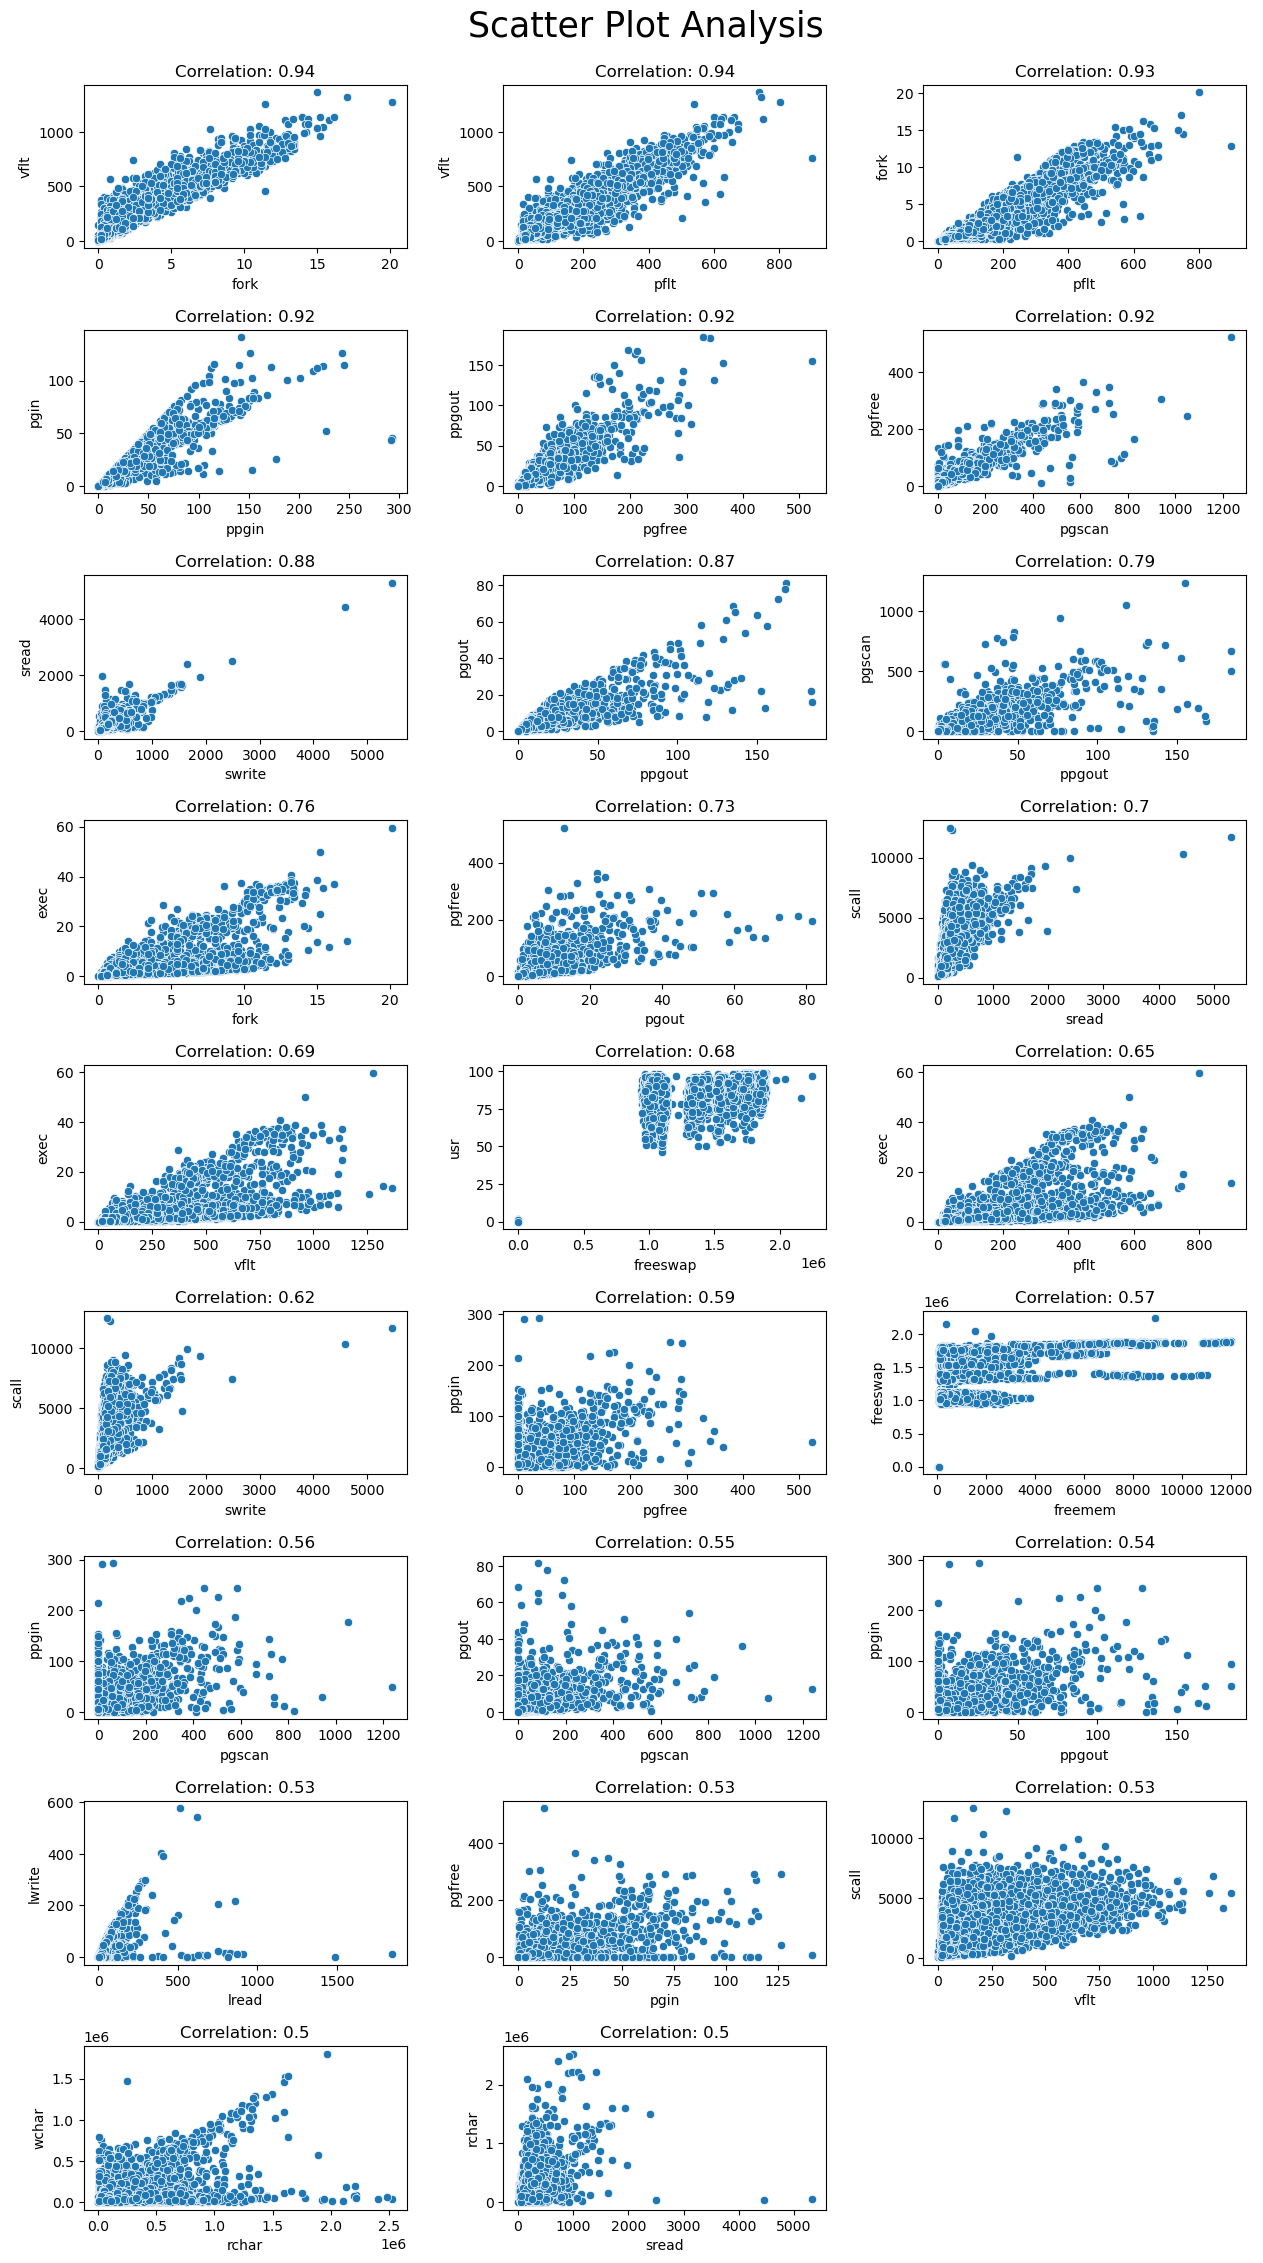

In [19]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()

for i in range(0,len(user_data_corr)):
    ax1 = fig.add_subplot(9,3,i+1)
    sns.scatterplot(x=user_data[user_data_corr.iloc[i,0]], y=user_data[user_data_corr.iloc[i,1]],ax=ax1)
    ax1.set_xlabel(user_data_corr.iloc[i,0])
    ax1.set_ylabel(user_data_corr.iloc[i,1])
    ax1.title.set_text(f'Correlation: {round(user_data_corr.iloc[i,2],2)}')
    
plt.suptitle('Scatter Plot Analysis', fontsize=25)
plt.show()

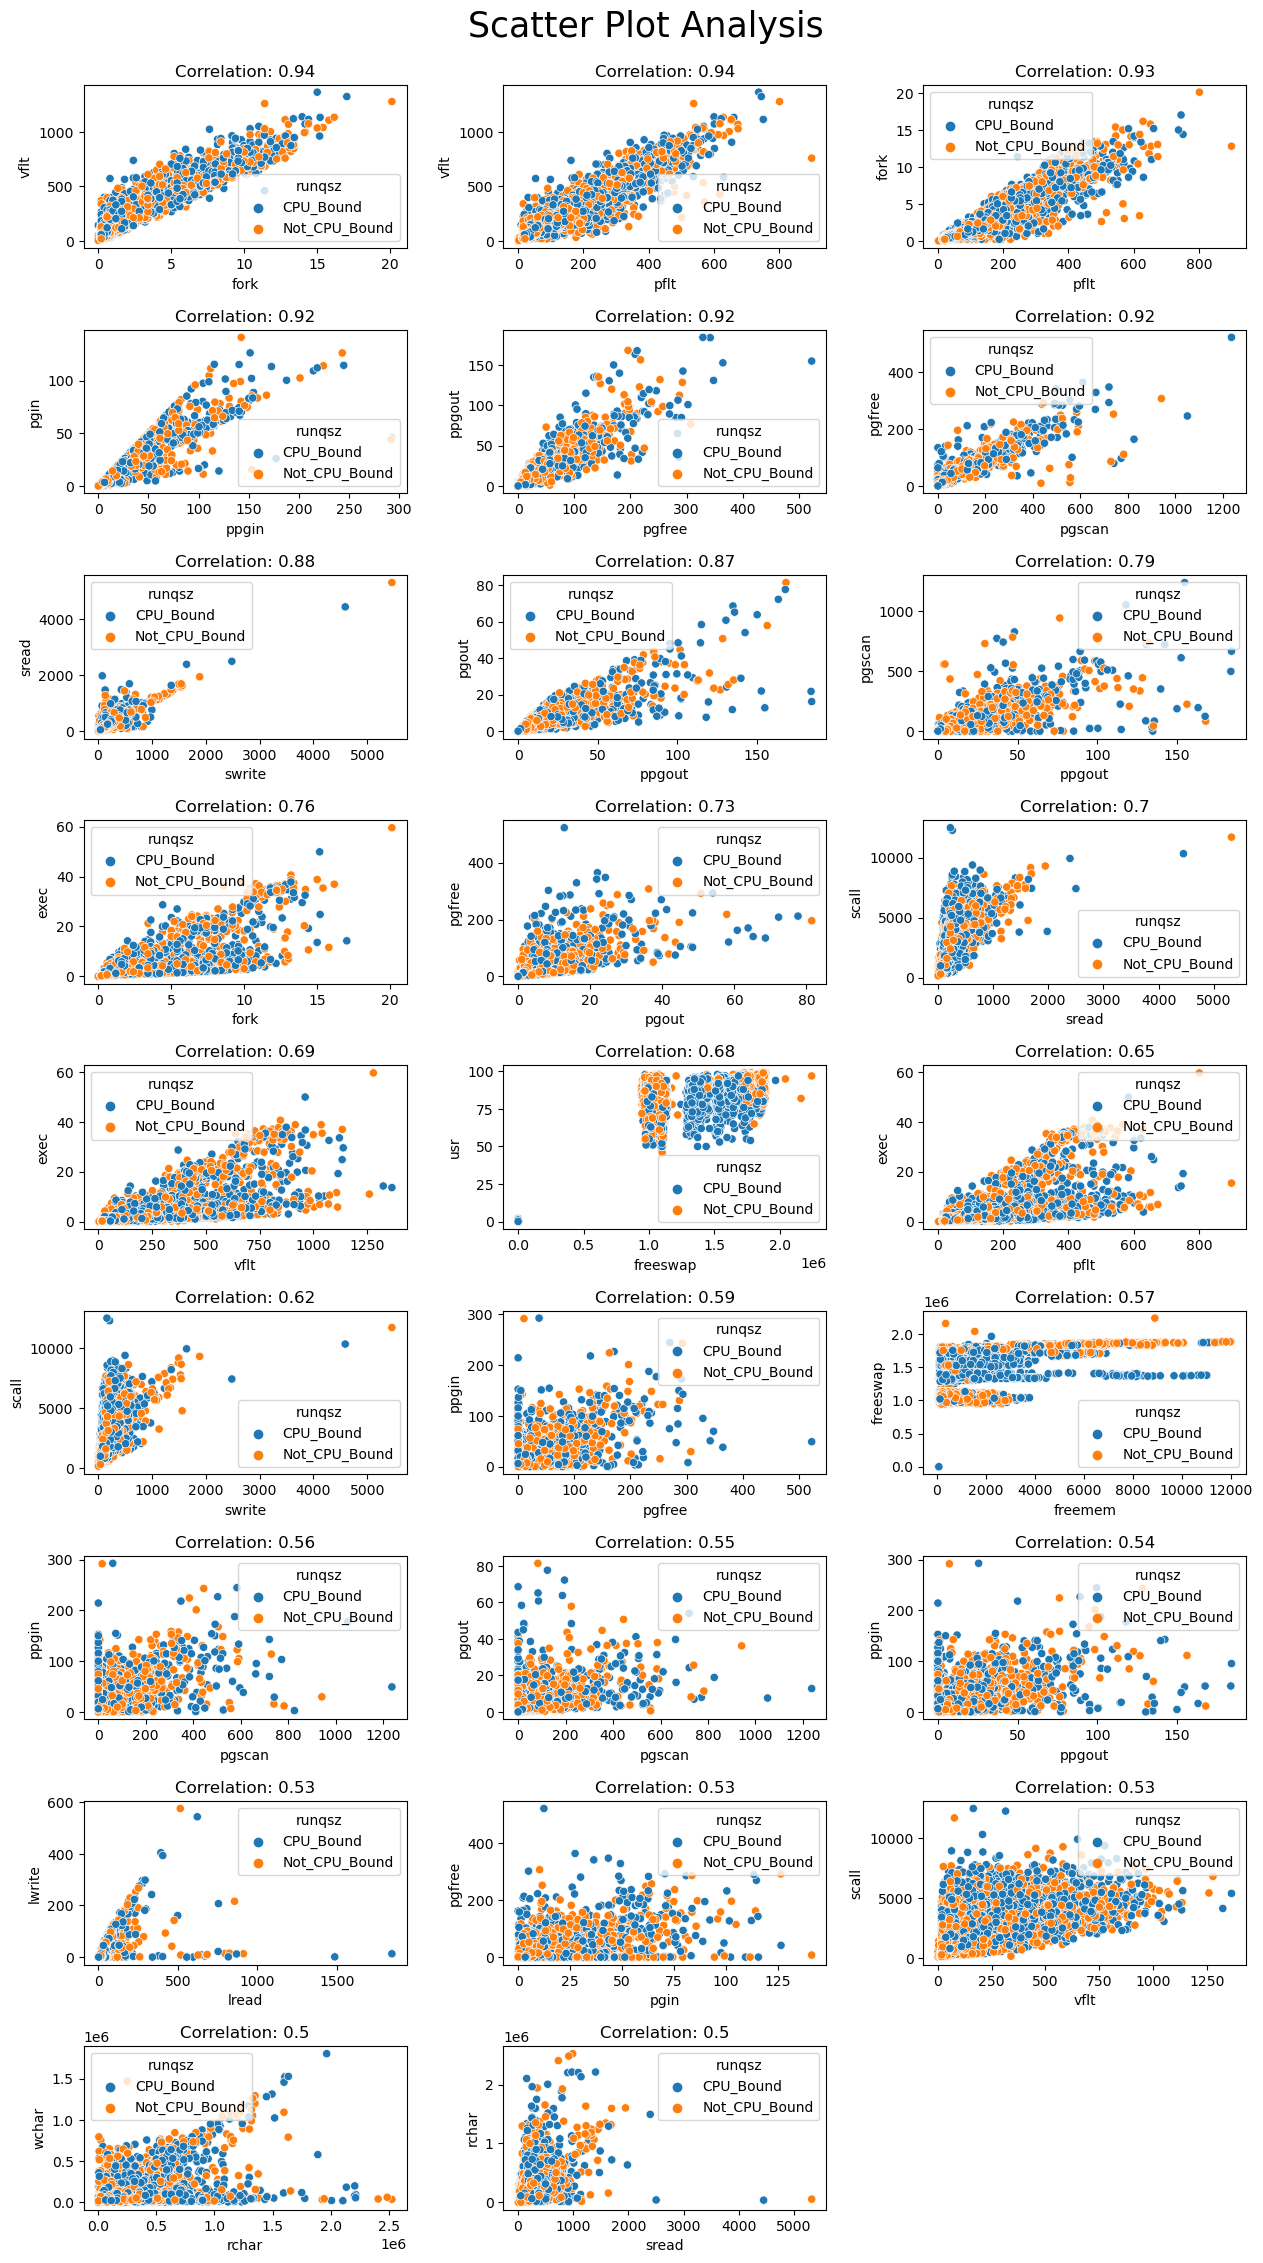

In [20]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()

for i in range(0,len(user_data_corr)):
    ax1 = fig.add_subplot(9,3,i+1)
    sns.scatterplot(x=user_data[user_data_corr.iloc[i,0]], y=user_data[user_data_corr.iloc[i,1]],hue=user_data['runqsz'],ax=ax1,)
    ax1.set_xlabel(user_data_corr.iloc[i,0])
    ax1.set_ylabel(user_data_corr.iloc[i,1])
    ax1.title.set_text(f'Correlation: {round(user_data_corr.iloc[i,2],2)}')
    
plt.suptitle('Scatter Plot Analysis', fontsize=25)
plt.show()

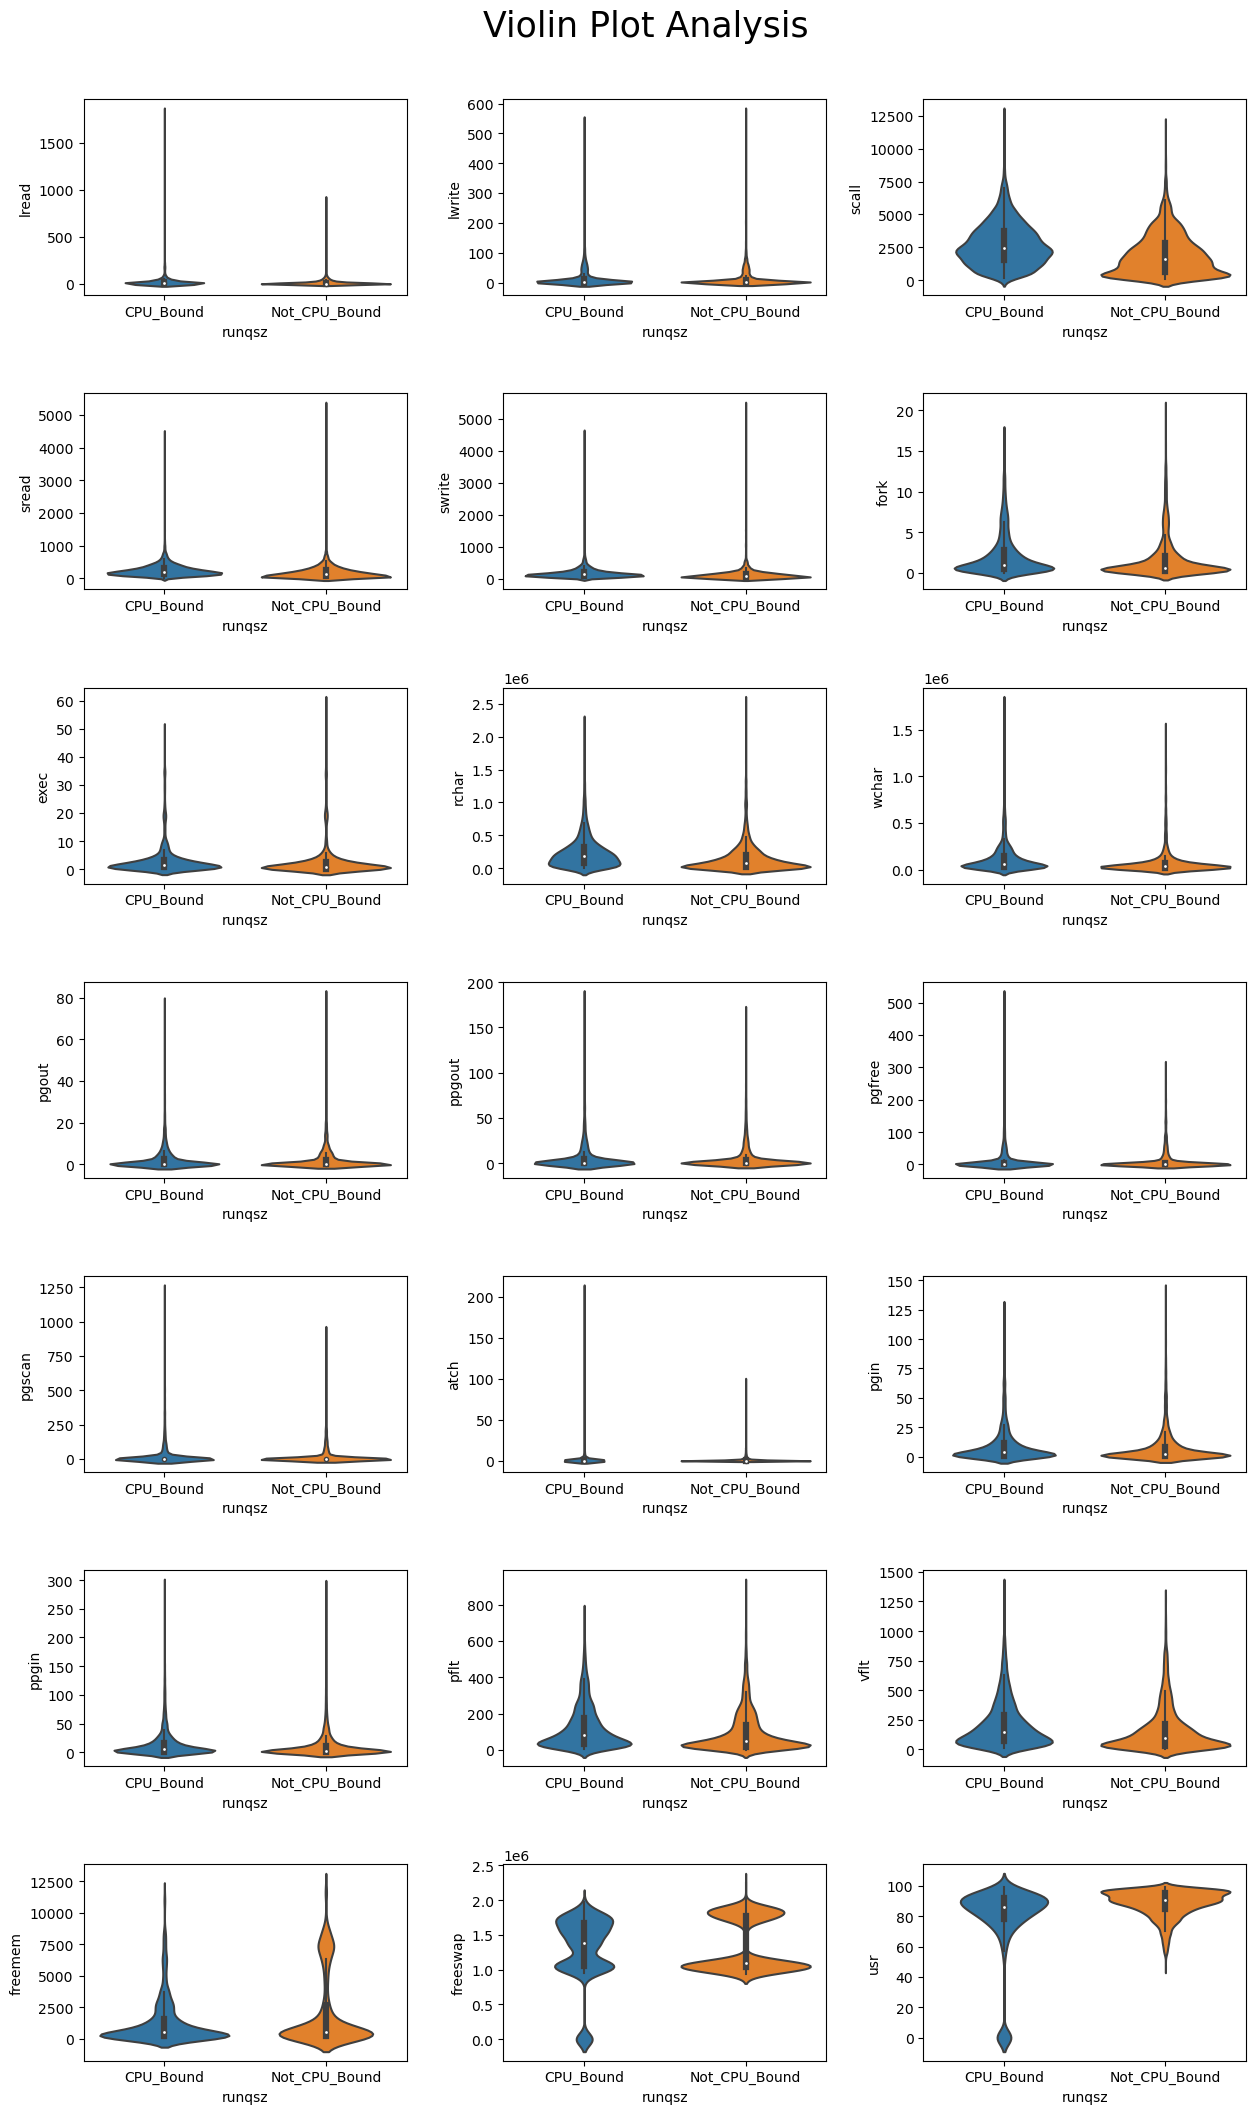

In [21]:
fig = plt.figure(figsize=(15,30))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()

for idx, col in enumerate(user_data.select_dtypes(include=['float64','int64']).columns):
    ax1 = fig.add_subplot(9,3,idx+1)
    sns.violinplot(y=user_data[col], x=user_data['runqsz'],ax=ax1)
    ax1.set_ylabel(col)
    
plt.suptitle('Violin Plot Analysis', fontsize=25)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <ul>
            <font size="3" color = DarkBlue >
            <li>From the histplot and boxplot, we could see that every feature has certain level of skewness. Almost all features have shown presence of definite outliers. Need to remove the outliers as the presence of outliers would affect the model's accuracy</li>
            <li>Pairplot and Heatmap does show corelation between some of the features in the datasets. We can also observe such information using corr() table. We can also this in scatterplot</li>
            <li>Captured the features where the correlation is greater than 0.5 and plotted a Scatterplot.</li>
            <li>Scatterplot shows the correlation for each features is affected linearly and it confirms that there is moderate to high correlation between below features</li>
                <ul>
                    <li> swrite and scall	</li>
                    <li> sread  and scall    </li>
                    <li> vflt 	and scall    </li>
                    <li> swrite and sread    </li>
                    <li> rchar 	and sread    </li>
                    <li> vflt 	and fork     </li>
                    <li> pflt 	and fork     </li>
                    <li> exec 	and fork     </li>
                    <li> vflt 	and exec     </li>
                    <li> pflt 	and exec     </li>
                    <li> rchar 	and wchar    </li>
                    <li> ppgout and pgout    </li>
                    <li> pgfree and pgout    </li>
                    <li> pgscan and pgout    </li>
                    <li> pgfree and ppgout   </li>
                    <li> pgscan and ppgout   </li>
                    <li> ppgin 	and ppgout   </li>
                    <li> pgin 	and pgfree   </li>
                    <li> pgscan and pgfree   </li>
                    <li> ppgin 	and pgfree   </li>
                    <li> pgin 	and pgscan   </li>
                    <li> ppgin 	and pgscan   </li>
                    <li> pgin 	and ppgin    </li>
                    <li> pflt 	and vflt     </li>
                    <li> freemem and freeswap</li>
                    <li> freeswap and usr	</li>
                </ul>
             <li>Violin plot shows how each value is spread for each of the features. For example-</li>
               <ul>
                    <li> lread - Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound but total number records that are zero or close to zero is more for Not CPU Bound than for CPU Bound. Maximum values for lread in CPU Bound is more than 1500 but in Not CPU Bound is around 1000</li>
					<li> lwrite - Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound but total number records that has zero or close to zero is more for Not CPU Bound than for CPU Bound. Maximum value for lwrite in CPU Bound is very close to 550 whereas the value in Not CPU Bound is around 590</li>
					<li> scall - Majority of the values are spread across 2500 for CPU Bound but for Not CPU Bound maximum values are spread across 0 to 2500. Maximum value for scall in CPU Bound is greater than 12500 whereas the maximum value in Not CPU Bound is less than 12500</li>
					<li> rchar - Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound. Maximum value for rchar in CPU Bound is less than 2.5 x 10^6 whereas the value in Not CPU Bound is more than 2.5 X 10^6</li>
					<li> wchar - Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound. Maximum value for wchar in CPU Bound is more than 1.5 x 10^6 whereas the value in Not CPU Bound is 1.5 X 10^6</li>					
                    <li> pgscan - Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound. Maximum value for pgscan in CPU Bound is close to 1250 whereas the value in Not CPU Bound is close to 1000.</li>					
                    <li> ppgin 	- Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound. Maximum value for ppgin in CPU Bound and in Not CPU Bound is close to 300.</li>
                    <li> pgin - Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound. Maximum value for pgin in CPU Bound is close to 125 whereas the value in Not CPU Bound is close to 150.</li>					
                    <li> vflt - Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound. Maximum value for vflt in CPU Bound is close to 1500 whereas the value in Not CPU Bound is less than 1500</li>					
                    <li> pflt - Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound. Maximum value for pflt in CPU Bound is close to 800 whereas the value in Not CPU Bound is more than 800</li>					
                    <li> freemem - Majority of the values are spread across 0 for both CPU Bound and Not CPU Bound. Maximum value for freemem in CPU Bound is close to 12500 whereas the value in Not CPU Bound is more than 12500.</li>					
                    <li> freeswap - Majority of the values are spread across 1 for both CPU Bound and Not CPU Bound. Maximum value for freeswap in CPU Bound is slightly more than 2.0 x 10^6 whereas the value in Not CPU Bound is close to 2.5 x 10^6</li>
                </ul>
        </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.2  Impute null values if present, also check for the values which are equal to zero. Do they have any 
meaning or do we need to change them or drop them? Check for the possibility of creating new features 
if required. Also check for outliers and duplicates if there.
            </span>   
        </font>    
</h3>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.2.1 Impute null values
            </span>   
        </font>    
</h3>

In [22]:
user_data.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [23]:
missing_values=pd.DataFrame(user_data.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / user_data.shape[0] * 100.00,2)
missing_values

Features  Missing count  % missing
0      lread              0       0.00
1     lwrite              0       0.00
2      scall              0       0.00
3      sread              0       0.00
4     swrite              0       0.00
5       fork              0       0.00
6       exec              0       0.00
7      rchar            104       1.27
8      wchar             15       0.18
9      pgout              0       0.00
10    ppgout              0       0.00
11    pgfree              0       0.00
12    pgscan              0       0.00
13      atch              0       0.00
14      pgin              0       0.00
15     ppgin              0       0.00
16      pflt              0       0.00
17      vflt              0       0.00
18    runqsz              0       0.00
19   freemem              0       0.00
20  freeswap              0       0.00
21       usr              0       0.00

In [24]:
user_data['rchar'] = user_data['rchar'].fillna(user_data['rchar'].median())
user_data['wchar'] = user_data['wchar'].fillna(user_data['wchar'].median())

In [25]:
missing_values=pd.DataFrame(user_data.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / user_data.shape[0] * 100.00,2)
missing_values

Features  Missing count  % missing
0      lread              0       0.00
1     lwrite              0       0.00
2      scall              0       0.00
3      sread              0       0.00
4     swrite              0       0.00
5       fork              0       0.00
6       exec              0       0.00
7      rchar              0       0.00
8      wchar              0       0.00
9      pgout              0       0.00
10    ppgout              0       0.00
11    pgfree              0       0.00
12    pgscan              0       0.00
13      atch              0       0.00
14      pgin              0       0.00
15     ppgin              0       0.00
16      pflt              0       0.00
17      vflt              0       0.00
18    runqsz              0       0.00
19   freemem              0       0.00
20  freeswap              0       0.00
21       usr              0       0.00

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.2.2 Zero Value for each variable
            </span>   
        </font>    
</h3>

In [26]:
zero_values = pd.DataFrame(user_data[user_data==0].notnull().sum().reset_index())
zero_values.columns = ['Features','ZerosCount']
zero_values['% of Zeros']=round((zero_values['ZerosCount']/user_data.shape[0])*100,2)
zero_values

Features  ZerosCount  % of Zeros
0      lread         675        8.24
1     lwrite        2684       32.76
2      scall           0        0.00
3      sread           0        0.00
4     swrite           0        0.00
5       fork          21        0.26
6       exec          21        0.26
7      rchar           0        0.00
8      wchar           0        0.00
9      pgout        4878       59.55
10    ppgout        4878       59.55
11    pgfree        4869       59.44
12    pgscan        6448       78.71
13      atch        4575       55.85
14      pgin        1220       14.89
15     ppgin        1220       14.89
16      pflt           3        0.04
17      vflt           0        0.00
18    runqsz           0        0.00
19   freemem           0        0.00
20  freeswap           0        0.00
21       usr         283        3.45

In [27]:
# user_data['lread'] = user_data['lread'].replace(to_replace=0, value=user_data['lread'].median())
# user_data['lwrite'] = user_data['lwrite'].replace(to_replace=0, value=user_data['lwrite'].median())
# user_data['ppgin'] = user_data['ppgin'].replace(to_replace=0, value=user_data['ppgin'].median())
# user_data['pgin'] = user_data['pgin'].replace(to_replace=0, value=user_data['pgin'].median())

In [28]:
# zero_values = pd.DataFrame(user_data[user_data==0].notnull().sum().reset_index())
# zero_values.columns = ['Features','ZerosCount']
# zero_values['% of Zeros']=round((zero_values['ZerosCount']/user_data.shape[0])*100,2)
# zero_values

In [29]:
# user_data = user_data.drop(['pgout','ppgout','pgfree','pgscan','atch'],axis=1)

In [30]:
# zero_values = pd.DataFrame(user_data[user_data==0].notnull().sum().reset_index())
# zero_values.columns = ['Features','ZerosCount']
# zero_values['% of Zeros']=round((zero_values['ZerosCount']/user_data.shape[0])*100,2)
# zero_values

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <ul>
            <font size="3" color = DarkBlue >
            <li>Features rchar and wchar have 1.27% and 0.84% of missing values. It can be imputed with median.</li>
            <li>lwrite,pgin and ppgin - features have 10% to 35% of Zeros in the datasets.</li>
			<li>pgout,ppgout,pgfree,pgscan and atch - These features have more than 50% of the data as Zeros</li>
			<li>lread, fork, exec, pflt and usr - These features have Zeros in the data sets ranging from 0% to 10%.</li>
            <li>The features with Zeros is a possibility in case of an idle system. Let us see when such features can attain Zeros:</li>
                <ul>
                    <li> lwrite - If there are no active processes that require data to be transferred between system memory and user memory, then the number of transfers per second between system memory and user memory would be zero.</li>
                    <li> pgin - If all the pages required by the processes are already in memory, then there would be no need for the operating system to fetch any pages from disk, and the number of page-in requests per second would be zero.</li>
                    <li> ppgin - If all of the pages required by the running processes are already in memory, then there is no possibility for the operating system to load any pages from disk, and the number of pages paged in per second would be zero. This can occur when a process has a relatively stable memory usage pattern and the operating system is able to allocate enough memory to accommodate all of the required pages without needing to swap any out to disk.</li>
                    <li> pgout - Page out requests occur when the operating system needs to write data from memory back to disk to free up memory for other processes. If there is enough free memory available in the system, and no process requires more memory than what is available, then the number of page out requests per second would be zero.</li>
                    <li> ppgout - If there is enough free memory available, and all running processes have allocated the memory they require, then there would be no need to page out any pages to disk, and the number of pages paged out per second would be zero.</li>
                    <li> pgfree - If there are no processes running or if all the processes have allocated all the memory they need, then there would be no need to add pages to the free list, and the number of pages per second placed on the free list would be zero</li>
                    <li> pgscan - The number of pages checked for freeing per second to be zero, if the system has enough free memory and there are no processes that require additional memory. In such cases, the operating system's memory management algorithm may not check any pages for freeing, as there are no pages that need to be reclaimed. However, in most cases, some level of memory management is required to keep the system running smoothly, even if there are no active memory requests</li>
                    <li> atch - If there are no processes running or if all the required pages are already in memory, then there won't be any need for page attachment, and the number of page attaches per second would be zero</li>
                </ul>
                <br> Overall, there are chances that each of the above features have Zeros as their real values. So, it is better to not to impute and treat all the zeros as real values.
        </ul> 
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.2.3 Outlier Treatment
            </span>   
        </font>    
</h3>

In [31]:
user_data.select_dtypes(include=['float64','int64']).columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'usr'], dtype='object')

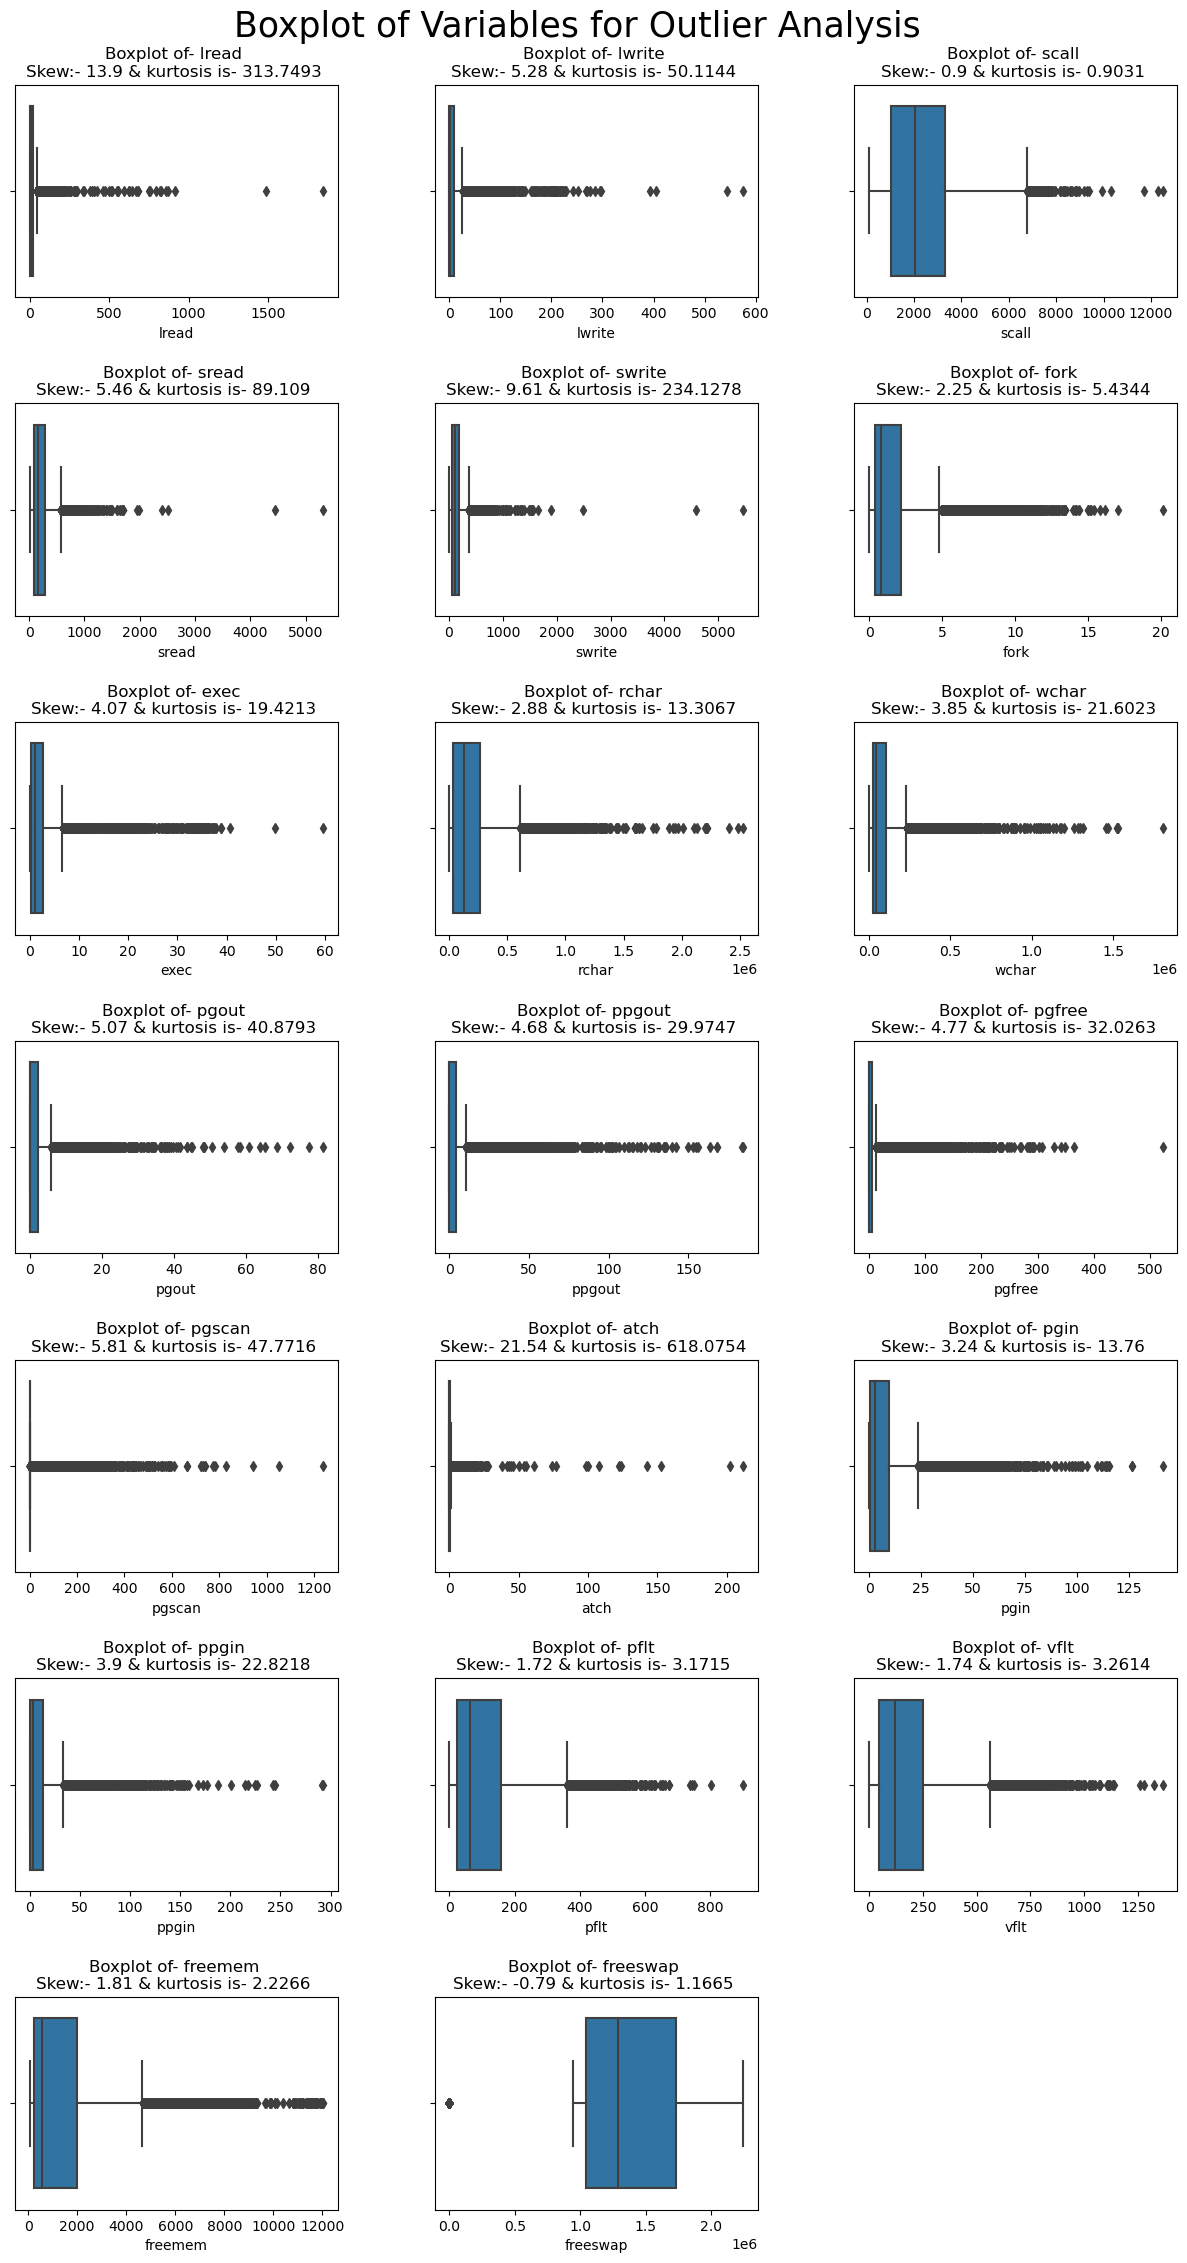

In [32]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()
for i, col in enumerate(user_data.drop(['runqsz','usr'],axis=1).columns):
    ax1 = fig.add_subplot(7,3,i+1)
    sns.boxplot(x=user_data[col], ax = ax1)
    ax1.title.set_text(f'Boxplot of- {col} \nSkew:- {round(user_data[col].skew(),2)} & kurtosis is- {round(user_data[col].kurtosis(),4)} ')
    
plt.suptitle('Boxplot of Variables for Outlier Analysis', fontsize=25)
plt.show()

In [33]:
def get_outlier_limits(colum_list):
    sorted(colum_list)
    q1, q3 = colum_list.quantile([0.25,0.75])
    iqr = q3 - q1
    low_val = q1-(1.5 * iqr)
    high_val = q3 + (1.5 * iqr)
    return low_val, high_val

In [34]:
for colum in user_data.drop(['runqsz'],axis=1).columns:
    lval, hval = get_outlier_limits(user_data[colum])
    user_data[colum]= np.where(user_data[colum]> hval, hval, user_data[colum])
    user_data[colum]= np.where(user_data[colum]< lval, lval, user_data[colum])

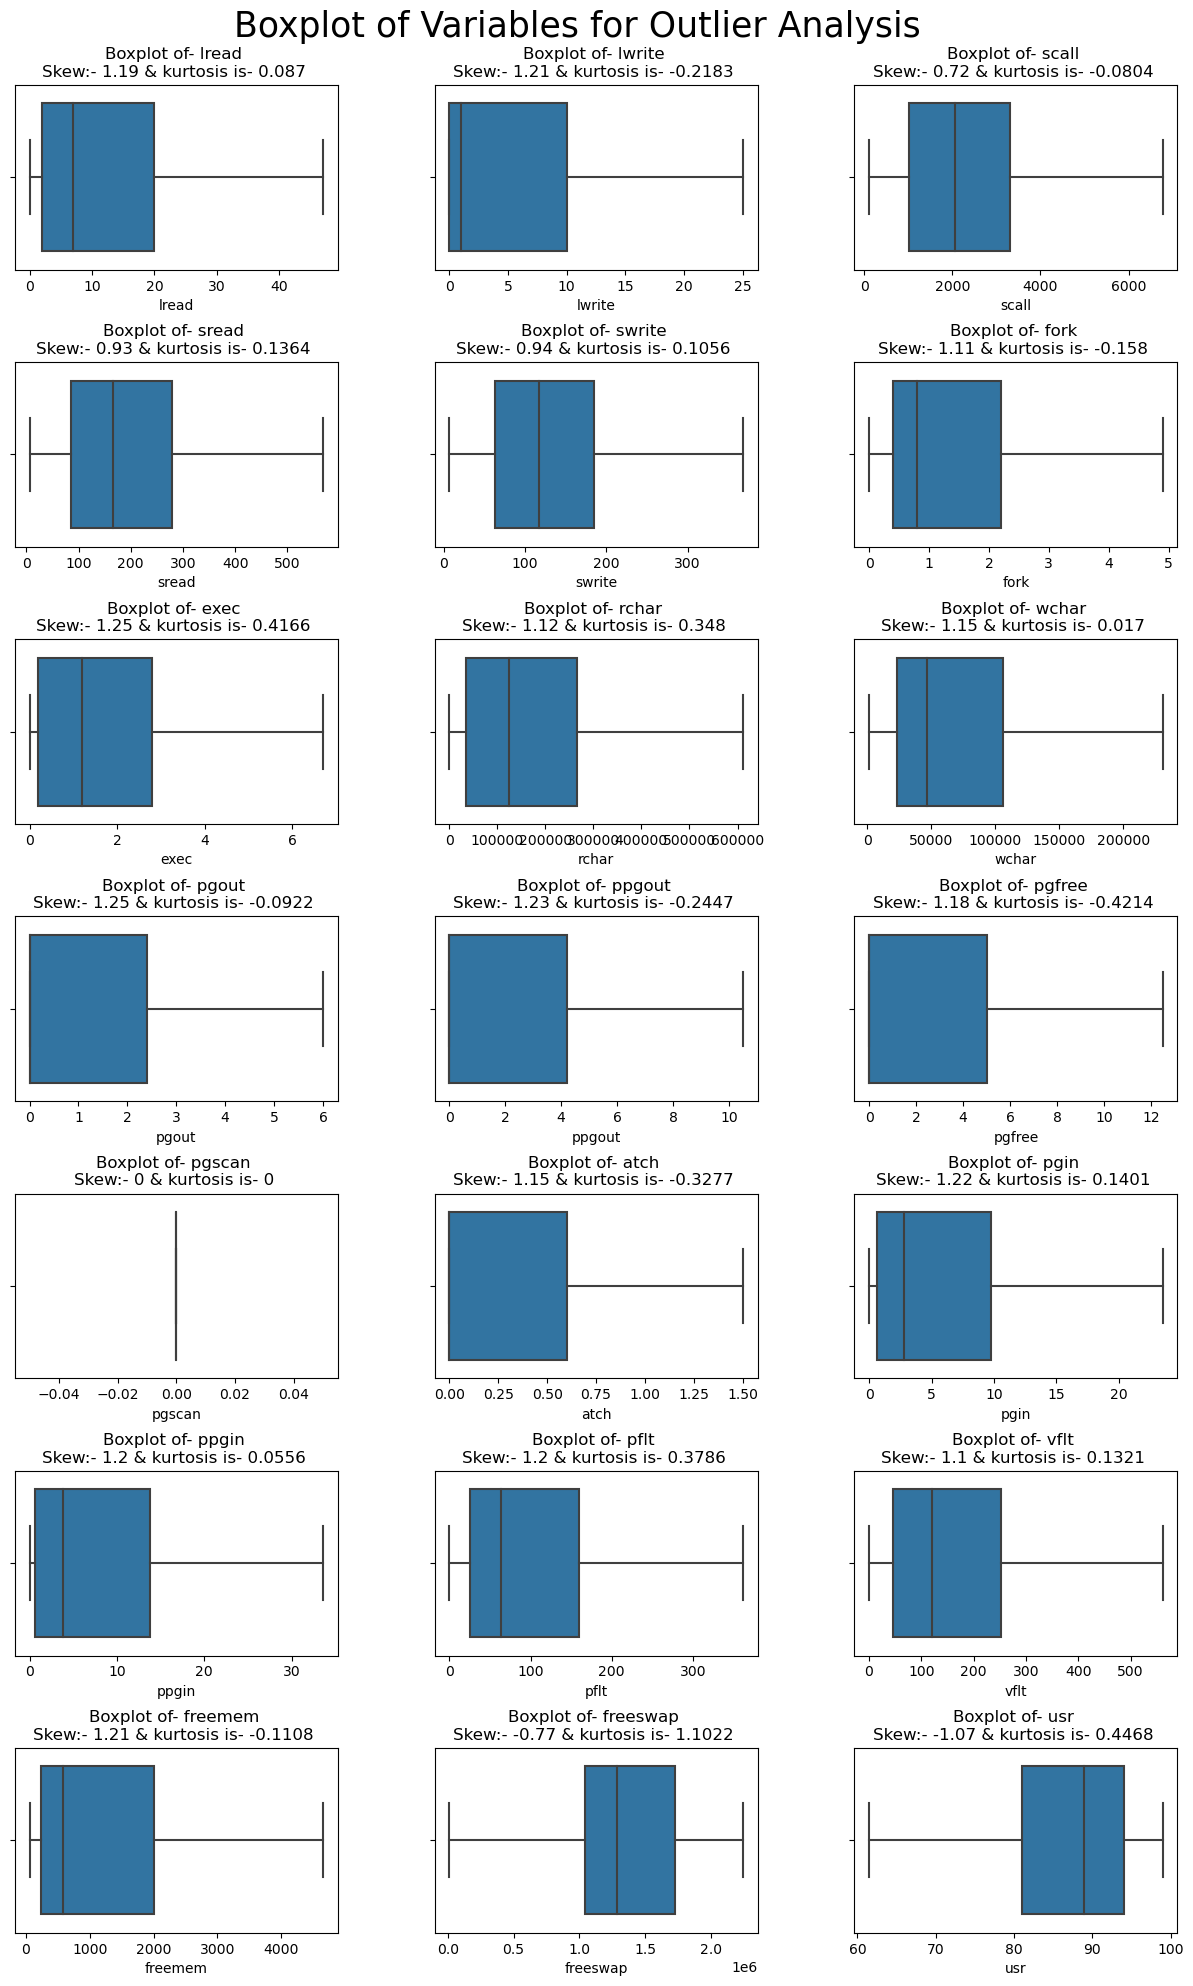

In [35]:
fig = plt.figure(figsize=(15,25))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()
for i, col in enumerate(user_data.drop(['runqsz'],axis=1).columns):
    ax1 = fig.add_subplot(8,3,i+1)
    sns.boxplot(x=user_data[col], ax = ax1)
    ax1.title.set_text(f'Boxplot of- {col} \nSkew:- {round(user_data[col].skew(),2)} & kurtosis is- {round(user_data[col].kurtosis(),4)} ')
    
plt.suptitle('Boxplot of Variables for Outlier Analysis', fontsize=25)
plt.show()

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.2.4  Checking the presence of duplicate records in the dataset
            </span>   
        </font>    
</h3>

In [36]:
user_data.duplicated().sum()

0

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observations: </b>
        <ul>
            <font size="3" color = DarkBlue >
            <li>Features with outliers will be treated by imputing the value to first quantile and thrid quantile based on the position of outlier.</li>
            <li>Populate the skewness and kurtosis of the features to understand the distribution.</li>
            <li>Skewness is a measure of the asymmetry of the distribution of a variable about its mean.</li>
			<li>Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution</li>
            <li>General thumb rule for the skewness is </li>
                <ul>
                    <li>If skewness is less than -1 or greater than 1, the distribution is highly skewed.</li>
                    <li>If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.</li>
                    <li>If skewness is between -0.5 and 0.5, the distribution is approximately symmetric</li>
                </ul>
             <li>General thumb rule for the Kurtosis is </li>
                <ul>
                    <li>If Kurtosis is 3 and Excess Kurtosis is Zero, then it is Normally distributed and tailedness is medium tailed</li>
                    <li>If Kurtosis is less than 3 and Excess Kurtosis is Negative, then it is Uniformly distributed and tailedness is thin tailed.</li>
                    <li>If Kurtosis is more than 3 and Excess Kurtosis is Positive, then it is Laplace distributed and tailedness is thick tailed</li>
                </ul>
            <li> Medium skewness and kurtosis is observed for the features- scall and freeswap</li>
			<li> High level of skewness and kurtosis is observed on remaining features such as -lread, lwrite, sread, swrite, fork, exec, rchar, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, vflt, runqsz and freemem</li>
                <li>After outlier treatment- we could see that skewness and kurtosis value has come closer to the moderate values</li>
                <li>We can see that values of pgscan is zero - mean, median and max and min is zero. This is because the feature had more than 70% of the data as Zero.</li>
                <li>There is no duplicate value in dataset</li>
        </ul>
    </span>    
</div>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.3  Encode the data (having string values) for Modelling. Split the data into train and test (70:30). 
Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate 
method from statsmodel. Create multiple models and check the performance of Predictions on Train and 
Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with 
appropriate reasoning.
            </span>   
        </font>    
</h3>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.3.1 Feature Engineering
            </span>   
        </font>    
</h3>

In [37]:
user_data.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  ppgout  pgfree  pgscan  atch  pgin  ppgin   pflt   vflt         runqsz  freemem   freeswap   usr
0   1.00    0.00 2147.00  79.00   68.00  0.20  0.20  40671.00 53995.00   0.00    0.00    0.00    0.00  0.00  1.60   2.60  16.00  26.40      CPU_Bound  4659.12 1730946.00 95.00
1   0.00    0.00  170.00  18.00   21.00  0.20  0.20    448.00  8385.00   0.00    0.00    0.00    0.00  0.00  0.00   0.00  15.63  16.83  Not_CPU_Bound  4659.12 1869002.00 97.00
2  15.00    3.00 2162.00 159.00  119.00  2.00  2.40 125473.50 31950.00   0.00    0.00    0.00    0.00  1.20  6.00   9.40 150.20 220.20  Not_CPU_Bound   702.00 1021237.00 87.00
3   0.00    0.00  160.00  12.00   16.00  0.20  0.20 125473.50  8670.00   0.00    0.00    0.00    0.00  0.00  0.20   0.20  15.60  16.80  Not_CPU_Bound  4659.12 1863704.00 98.00
4   5.00    1.00  330.00  39.00   38.00  0.40  0.40 125473.50 12185.00   0.00    0.00    0.00    0.00  0.00  1.00   1.20  37.80  47.60  Not_CPU_Bound   633.00 1760253.00 90.00

In [38]:
user_data['runqsz'].unique()

array(['CPU_Bound', 'Not_CPU_Bound'], dtype=object)

In [39]:
user_data['runqsz']=np.where(user_data['runqsz']=='CPU_Bound',1,0)

In [40]:
user_data['runqsz'].unique()

array([1, 0])

In [41]:
user_data['runqsz'] = user_data['runqsz'].astype(int)

In [42]:
user_data.dtypes

lread       float64
lwrite      float64
scall       float64
sread       float64
swrite      float64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz        int32
freemem     float64
freeswap    float64
usr         float64
dtype: object

In [43]:
user_data.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  ppgout  pgfree  pgscan  atch  pgin  ppgin   pflt   vflt  runqsz  freemem   freeswap   usr
0   1.00    0.00 2147.00  79.00   68.00  0.20  0.20  40671.00 53995.00   0.00    0.00    0.00    0.00  0.00  1.60   2.60  16.00  26.40       1  4659.12 1730946.00 95.00
1   0.00    0.00  170.00  18.00   21.00  0.20  0.20    448.00  8385.00   0.00    0.00    0.00    0.00  0.00  0.00   0.00  15.63  16.83       0  4659.12 1869002.00 97.00
2  15.00    3.00 2162.00 159.00  119.00  2.00  2.40 125473.50 31950.00   0.00    0.00    0.00    0.00  1.20  6.00   9.40 150.20 220.20       0   702.00 1021237.00 87.00
3   0.00    0.00  160.00  12.00   16.00  0.20  0.20 125473.50  8670.00   0.00    0.00    0.00    0.00  0.00  0.20   0.20  15.60  16.80       0  4659.12 1863704.00 98.00
4   5.00    1.00  330.00  39.00   38.00  0.40  0.40 125473.50 12185.00   0.00    0.00    0.00    0.00  0.00  1.00   1.20  37.80  47.60       0   633.00 1760253.00 90.00

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.3.2  Split the data into Train and Test (70:30) and apply LinearRegression using scikit-learn
            </span>   
        </font>    
</h3>

In [44]:
X = user_data.drop('usr',axis=1)
Y = user_data['usr']
# let's add the intercept to data
X = sm.add_constant(X)

In [45]:
X.head()

const  lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  ppgout  pgfree  pgscan  atch  pgin  ppgin   pflt   vflt  runqsz  freemem   freeswap
0   1.00   1.00    0.00 2147.00  79.00   68.00  0.20  0.20  40671.00 53995.00   0.00    0.00    0.00    0.00  0.00  1.60   2.60  16.00  26.40       1  4659.12 1730946.00
1   1.00   0.00    0.00  170.00  18.00   21.00  0.20  0.20    448.00  8385.00   0.00    0.00    0.00    0.00  0.00  0.00   0.00  15.63  16.83       0  4659.12 1869002.00
2   1.00  15.00    3.00 2162.00 159.00  119.00  2.00  2.40 125473.50 31950.00   0.00    0.00    0.00    0.00  1.20  6.00   9.40 150.20 220.20       0   702.00 1021237.00
3   1.00   0.00    0.00  160.00  12.00   16.00  0.20  0.20 125473.50  8670.00   0.00    0.00    0.00    0.00  0.00  0.20   0.20  15.60  16.80       0  4659.12 1863704.00
4   1.00   5.00    1.00  330.00  39.00   38.00  0.40  0.40 125473.50 12185.00   0.00    0.00    0.00    0.00  0.00  1.00   1.20  37.80  47.60       0   633.00 1760253.00

In [46]:
Y.head()

0   95.00
1   97.00
2   87.00
3   98.00
4   90.00
Name: usr, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)

In [48]:
X_train.head()

const  lread  lwrite   scall  sread  swrite  fork  exec     rchar     wchar  pgout  ppgout  pgfree  pgscan  atch  pgin  ppgin   pflt   vflt  runqsz  freemem   freeswap
694    1.00   1.00    1.00 1345.00 223.00  192.00  0.60  0.60 198703.00 230625.88   0.60    6.20   12.50    0.00  1.50  3.80   7.40  28.20  56.60       1   121.00 1375446.00
5535   1.00   1.00    1.00 1429.00  87.00   67.00  0.20  0.20   7163.00  24842.00   0.00    0.00    0.00    0.00  0.00  1.60   1.60  15.77  30.74       0  1476.00 1021541.00
4244   1.00  47.00   25.00 3273.00 225.00  180.00  0.60  0.40  83246.00  53705.00   5.39    7.19    7.19    0.00  1.50  3.99   4.59  59.88  74.05       1    82.00   10989.50
2472   1.00  13.00    8.00 4349.00 300.00  191.00  2.80  3.00  96009.00  70467.00   0.00    0.00    0.00    0.00  0.00  2.80   3.20 129.00 236.80       1   772.00  993909.00
7052   1.00  17.00   23.00  225.00  13.00   13.00  0.40  1.60  17132.00  12514.00   0.00    0.00    0.00    0.00  0.00  0.00   0.00  19.80  23.80       0  4179.00 1821682.00

In [49]:
X_test.head()

const  lread  lwrite   scall  sread  swrite  fork  exec     rchar     wchar  pgout  ppgout  pgfree  pgscan  atch  pgin  ppgin   pflt   vflt  runqsz  freemem   freeswap
3894   1.00  27.00   25.00 1252.00  53.00  118.00  0.20  0.20  26592.00  54394.00   0.00    0.00    0.00    0.00  0.00  0.40   0.60  19.44  20.04       0  4659.12 1875466.00
4276   1.00   1.00    0.00  996.00  85.00   55.00  0.40  0.40  16667.00  36431.00   0.00    0.00    0.00    0.00  0.00  1.00   1.40  35.53  52.10       0  2979.00 1010114.00
3414   1.00   9.00    7.00 1530.00 247.00  135.00  0.40  0.40  14513.00  61905.00   6.00   10.50   12.50    0.00  1.50 14.80  18.40  26.80 186.20       1    89.00   10989.50
4165   1.00  32.00    4.00 3243.00 182.00  140.00  4.90  5.60 337517.00  94832.00   0.80    1.00    1.00    0.00  1.40  4.60   7.00 250.60 420.20       1  1300.00 1535309.00
7385   1.00  16.00    3.00 5017.00 259.00  249.00  2.80  1.40  73537.00 230625.88   0.00    0.00    0.00    0.00  0.00  5.60   5.80 142.80 276.20       1  2114.00  988600.00

In [50]:
y_train.head()

694    91.00
5535   94.00
4244   61.50
2472   83.00
7052   94.00
Name: usr, dtype: float64

In [51]:
y_test.head()

3894   95.00
4276   95.00
3414   61.50
4165   80.00
7385   79.00
Name: usr, dtype: float64

In [52]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train,y_train)

LinearRegression()

In [53]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, sklearn_model.coef_[idx]))

# Let us check the intercept for the model
intercept = sklearn_model.intercept_
print("The intercept for our model is {}".format(intercept))

The coefficient for const is 0.0
The coefficient for lread is -0.06348150618192067
The coefficient for lwrite is 0.04816128709138007
The coefficient for scall is -0.0006638280111674559
The coefficient for sread is 0.0003082521031468828
The coefficient for swrite is -0.005421822297634905
The coefficient for fork is 0.02931272724853413
The coefficient for exec is -0.3211664838983207
The coefficient for rchar is -5.166841759467052e-06
The coefficient for wchar is -5.4028752353798075e-06
The coefficient for pgout is -0.36881906387314134
The coefficient for ppgout is -0.07659768212739958
The coefficient for pgfree is 0.08448414470555599
The coefficient for pgscan is 1.1102230246251565e-16
The coefficient for atch is 0.6275741574811604
The coefficient for pgin is 0.019987907678700713
The coefficient for ppgin is -0.0673338397570058
The coefficient for pflt is -0.03360282937751588
The coefficient for vflt is -0.005463668798521301
The coefficient for runqsz is -1.6152978488249181
The coefficie

In [54]:
# R square for Linear Regression Data
skl_accuracy1 = sklearn_model.score(X_train,y_train)
skl_accuracy2 = sklearn_model.score(X_test,y_test)

prediction_on_training_data = sklearn_model.fit(X_train,y_train).predict(X_train)
prediction_on_test_data = sklearn_model.fit(X_train,y_train).predict(X_test)

skl_rmse1 = np.sqrt(metrics.mean_squared_error(y_train,prediction_on_training_data))
skl_rmse2 = np.sqrt(metrics.mean_squared_error(y_test,prediction_on_test_data))

skl_mae1 = mean_absolute_error(y_train, prediction_on_training_data)
skl_mae2 = mean_absolute_error(y_test, prediction_on_test_data)

print(f'R Square on training data is {skl_accuracy1}')
print(f'R Square on test data is {skl_accuracy2}')
print(f'RMSE on training data is {skl_rmse1}')
print(f'RMSE on test data is {skl_rmse2}')
print(f'MAE on training data is {skl_mae1}')
print(f'MAE on test data is {skl_mae2}')

R Square on training data is 0.796108610127457
R Square on test data is 0.7677318597936766
RMSE on training data is 4.419536092979902
RMSE on test data is 4.652295704192005
MAE on training data is 3.2852683707936245
MAE on test data is 3.3810017893014925


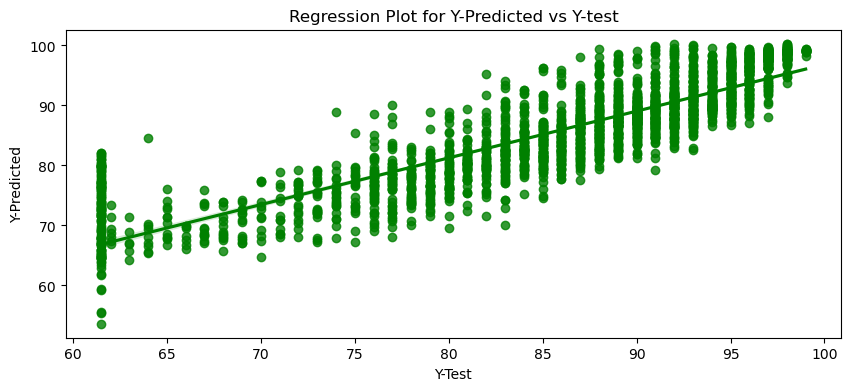

In [55]:
plt.figure(figsize=(10,4))
sns.regplot(x=y_test,y=prediction_on_test_data, color='green')
plt.title("Regression Plot for Y-Predicted vs Y-test");
plt.xlabel("Y-Test")
plt.ylabel("Y-Predicted")
plt.show()

**Linear Regression Model Accuracy of training data: 0.796108610127457, so 79.61% of the variationin the usr is explained by the predictors in the model for train set**

**Linear Regression Model Accuracy of testing data: 0.7677318597936766, so 76.77% of the variation inthe usr is explained by the predictors in the model for test set**

### Linear Equation for Linear Regression using sklearn

In [56]:
intercept = sklearn_model.intercept_
for idx, col_name in enumerate(X_train.columns):
    if idx == 0:
        print(f'usr = {intercept}', end='+ ')
    print(f'{round(sklearn_model.coef_[idx],7)}*({col_name})', end='+ ')


usr = 85.73703864412536+ 0.0*(const)+ -0.0634815*(lread)+ 0.0481613*(lwrite)+ -0.0006638*(scall)+ 0.0003083*(sread)+ -0.0054218*(swrite)+ 0.0293127*(fork)+ -0.3211665*(exec)+ -5.2e-06*(rchar)+ -5.4e-06*(wchar)+ -0.3688191*(pgout)+ -0.0765977*(ppgout)+ 0.0844841*(pgfree)+ 0.0*(pgscan)+ 0.6275742*(atch)+ 0.0199879*(pgin)+ -0.0673338*(ppgin)+ -0.0336028*(pflt)+ -0.0054637*(vflt)+ -1.6152978*(runqsz)+ -0.0004585*(freemem)+ 8.8e-06*(freeswap)+ 

### Linear Equation for Linear Regression(scikit-learn) is:-

usr = 85.73703864412536+ 0.0*(const)+ -0.0634815*(lread)+ 0.0481613*(lwrite)+ -0.0006638*(scall)+ 0.0003083*(swrite)+ -0.0054218*(exec)+ 0.0293127*(rchar)+ -0.3211665*(wchar)+ -5.2e-06*(pgout)+ -5.4e-06*(atch)+ -0.3688191*(pgin)+ -0.0765977*(pflt)+ 0.0844841*(runqsz)+ 0.0*(freemem)+ 0.6275742*(freeswap)

### Linear Regression using statsmodels(OLS)

In [57]:
ols_model = sm.OLS(y_train,X_train).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:06   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.7370      0.296    289.444      0.0

In [58]:
prediction_on_training_data = ols_model.predict(X_train)
print(f'RMSE on training data is {np.sqrt(metrics.mean_squared_error(y_train,prediction_on_training_data))}')

RMSE on training data is 4.419536092979902


### Let us check for Multicollinearity - Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.

In [59]:
vif_series = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])], index=X_train.columns)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const      25.66
lread       5.35
lwrite      4.33
scall       2.96
sread       6.42
swrite      5.60
fork       13.04
exec        3.24
rchar       2.13
wchar       1.58
pgout      11.36
ppgout     29.40
pgfree     16.50
pgscan       NaN
atch        1.88
pgin       13.81
ppgin      13.95
pflt       12.00
vflt       15.97
runqsz      1.16
freemem     1.96
freeswap    1.84
dtype: float64



Since pgscan doesn't have any non-zero values, we can remove it and check the performance of models.

In [60]:
X_train2 = X_train.drop('pgscan',axis=1)
ols_model2 = sm.OLS(y_train,X_train2).fit()
print("R-squared:", np.round(ols_model2.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model2.rsquared_adj, 3),)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [61]:
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:06   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.7370      0.296    289.444      0.0

* On dropping 'pgscan' adj. R-squared remains the same.

In [62]:
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])], index=X_train2.columns)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const      25.66
lread       5.35
lwrite      4.33
scall       2.96
sread       6.42
swrite      5.60
fork       13.04
exec        3.24
rchar       2.13
wchar       1.58
pgout      11.36
ppgout     29.40
pgfree     16.50
atch        1.88
pgin       13.81
ppgin      13.95
pflt       12.00
vflt       15.97
runqsz      1.16
freemem     1.96
freeswap    1.84
dtype: float64



**Since there is no effect on adj. R-squared after dropping the 'pgscan' column, we can remove it from the training set.**

In [63]:
X_train = X_train.drop(['pgscan'],axis=1)

In [64]:
X_train3 = X_train.drop('vflt',axis=1)
ols_model3 = sm.OLS(y_train,X_train3).fit()
print("R-squared:", np.round(ols_model3.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model3.rsquared_adj, 3),)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'vflt' adj. R-squared remains the same.

In [65]:
X_train4 = X_train.drop('pflt',axis=1)
ols_model4 = sm.OLS(y_train,X_train4).fit()
print("R-squared:", np.round(ols_model4.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model4.rsquared_adj, 3),)

R-squared: 0.786 
Adjusted R-squared: 0.785


* On dropping 'pflt' adj. R-squared reduced by 0.01.

In [66]:
X_train5 = X_train.drop('fork',axis=1)
ols_model5 = sm.OLS(y_train,X_train5).fit()
print("R-squared:", np.round(ols_model5.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model5.rsquared_adj, 3),)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'fork' adj. R-squared remained same.

In [67]:
X_train6 = X_train.drop('vflt',axis=1)
ols_model6 = sm.OLS(y_train,X_train6).fit()
print(ols_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1170.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:06   Log-Likelihood:                -16664.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5714   BIC:                         3.350e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.5941      0.294    290.936      0.0

In [68]:
vif_series6 = pd.Series([variance_inflation_factor(X_train6.values,i) for i in range(X_train6.shape[1])], index=X_train6.columns)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const      25.26
lread       5.34
lwrite      4.33
scall       2.95
sread       6.37
swrite      5.60
fork       10.09
exec        3.24
rchar       2.12
wchar       1.56
pgout      11.35
ppgout     29.40
pgfree     16.49
atch        1.86
pgin       13.63
ppgin      13.95
pflt        9.13
runqsz      1.16
freemem     1.96
freeswap    1.79
dtype: float64



**Since there is no effect on adj. R-squared after dropping the 'vflt' column, we can remove it from the training set.**

In [69]:
X_train = X_train.drop('vflt',axis=1)

In [70]:
X_train7 = X_train.drop('ppgin',axis=1)
ols_model7 = sm.OLS(y_train,X_train7).fit()
print("R-squared:", np.round(ols_model7.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model7.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.795


* On dropping 'ppgin' adj. R-squared remained same.

In [71]:
X_train8 = X_train.drop('pgin',axis=1)
ols_model8 = sm.OLS(y_train,X_train8).fit()
print("R-squared:", np.round(ols_model8.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model8.rsquared_adj, 3),)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'pgin' adj. R-squared remained same.

In [72]:
X_train9 = X_train.drop('pgfree',axis=1)
ols_model9 = sm.OLS(y_train,X_train9).fit()
print("R-squared:", np.round(ols_model9.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model9.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.795


* On dropping 'pgfree' adj. R-squared remained same.

In [73]:
X_train10 = X_train.drop('ppgin',axis=1)
ols_model10 = sm.OLS(y_train,X_train10).fit()
print(ols_model10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1233.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:07   Log-Likelihood:                -16670.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5715   BIC:                         3.350e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6245      0.294    290.904      0.0

In [74]:
vif_series10 = pd.Series([variance_inflation_factor(X_train10.values,i) for i in range(X_train10.shape[1])], index=X_train10.columns)
print("VIF values: \n\n{}\n".format(vif_series10))

VIF values: 

const      25.23
lread       5.30
lwrite      4.32
scall       2.95
sread       6.37
swrite      5.60
fork       10.08
exec        3.24
rchar       2.09
wchar       1.56
pgout      11.31
ppgout     29.28
pgfree     16.49
atch        1.86
pgin        1.53
pflt        9.13
runqsz      1.16
freemem     1.96
freeswap    1.79
dtype: float64



**Since there is no effect on adj. R-squared after dropping the 'ppgin' column, we can remove it from the training set.**

In [75]:
X_train = X_train.drop(['ppgin'],axis=1)

In [76]:
X_train11 = X_train.drop('ppgout',axis=1)
ols_model11 = sm.OLS(y_train,X_train11).fit()
print("R-squared:", np.round(ols_model11.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model11.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.795


* On dropping 'ppgout' adj. R-squared remains the same.

In [77]:
X_train12 = X_train.drop('pgout',axis=1)
ols_model12 = sm.OLS(y_train,X_train12).fit()
print("R-squared:", np.round(ols_model12.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model12.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.794


* On dropping 'pgout' adj. R-squared reduces by 0.001

In [78]:
X_train13 = X_train.drop('pgfree',axis=1)
ols_model13 = sm.OLS(y_train,X_train13).fit()
print("R-squared:", np.round(ols_model13.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model13.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.794


* On dropping 'pgfree' adj. R-squared reduces by 0.001

In [79]:
X_train14 = X_train.drop('ppgout',axis=1)
ols_model14 = sm.OLS(y_train,X_train14).fit()
print(ols_model14.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1305.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:07   Log-Likelihood:                -16671.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5716   BIC:                         3.350e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6548      0.293    291.994      0.0

In [80]:
vif_series14 = pd.Series([variance_inflation_factor(X_train14.values,i) for i in range(X_train14.shape[1])], index=X_train14.columns)
print("VIF values: \n\n{}\n".format(vif_series14))

VIF values: 

const      25.06
lread       5.30
lwrite      4.32
scall       2.95
sread       6.37
swrite      5.60
fork       10.07
exec        3.24
rchar       2.09
wchar       1.56
pgout       6.45
pgfree      6.09
atch        1.86
pgin        1.53
pflt        9.13
runqsz      1.16
freemem     1.96
freeswap    1.79
dtype: float64



**Since there is no effect on adj. R-squared after dropping the 'ppgout' column, we can remove it from the training set.**

In [81]:
X_train = X_train.drop(['ppgout'],axis=1)

In [82]:
X_train15 = X_train.drop(['fork'],axis=1)
ols_model15 = sm.OLS(y_train,X_train15).fit()
print("R-squared:", np.round(ols_model15.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model15.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.794


* On dropping 'fork' adj. R-squared reduces by 0.001.

In [83]:
X_train16 = X_train.drop(['sread'],axis=1)
ols_model16 = sm.OLS(y_train,X_train16).fit()
print("R-squared:", np.round(ols_model16.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model16.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.795


* On dropping 'sread' adj. R-squared remains same.

In [84]:
X_train17 = X_train.drop(['pgfree'],axis=1)
ols_model17 = sm.OLS(y_train,X_train17).fit()
print("R-squared:", np.round(ols_model17.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model17.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.795


* On dropping 'pgfree' adj. R-squared remains same.

In [85]:
X_train18 = X_train.drop(['sread'],axis=1)
ols_model18 = sm.OLS(y_train,X_train18).fit()
print(ols_model18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1387.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:07   Log-Likelihood:                -16671.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5717   BIC:                         3.349e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6547      0.293    292.418      0.0

* On dropping 'sread' adj. R-squared remains the same.

In [86]:
vif_series18 = pd.Series([variance_inflation_factor(X_train18.values,i) for i in range(X_train18.shape[1])], index=X_train18.columns)
print("VIF values: \n\n{}\n".format(vif_series18))

VIF values: 

const      24.99
lread       5.30
lwrite      4.31
scall       2.70
swrite      3.20
fork       10.07
exec        3.23
rchar       1.67
wchar       1.55
pgout       6.44
pgfree      6.09
atch        1.86
pgin        1.53
pflt        9.10
runqsz      1.16
freemem     1.96
freeswap    1.77
dtype: float64



**Since there is no effect on adj. R-squared after dropping the 'sread' column, we can remove it from the training set.**

In [87]:
X_train = X_train.drop(['sread'],axis=1)

In [88]:
X_train19 = X_train.drop(['fork'],axis=1)
ols_model19 = sm.OLS(y_train,X_train19).fit()
print("R-squared:", np.round(ols_model19.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model19.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.794


* On dropping 'fork' adj. R-squared reduces by 0.001.

In [89]:
X_train20 = X_train.drop(['pgfree'],axis=1)
ols_model20 = sm.OLS(y_train,X_train20).fit()
print("R-squared:", np.round(ols_model20.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model20.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.795


* On dropping 'pgfree' adj. R-squared remains same.

In [90]:
X_train21 = X_train.drop(['pgout'],axis=1)
ols_model21 = sm.OLS(y_train,X_train21).fit()
print("R-squared:", np.round(ols_model21.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model21.rsquared_adj, 3),)

R-squared: 0.794 
Adjusted R-squared: 0.793


* On dropping 'pgfree' adj. R-squared reduces by 0.002.

In [91]:
X_train22 = X_train.drop(['pflt'],axis=1)
ols_model22 = sm.OLS(y_train,X_train22).fit()
print("R-squared:", np.round(ols_model22.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model22.rsquared_adj, 3),)

R-squared: 0.778 
Adjusted R-squared: 0.778


* On dropping 'pflt' adj. R-squared reduces by 0.015.

In [92]:
X_train23 = X_train.drop(['pgfree'],axis=1)
ols_model23 = sm.OLS(y_train,X_train23).fit()
print(ols_model23.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1479.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:07   Log-Likelihood:                -16672.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5718   BIC:                         3.348e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6534      0.293    292.412      0.0

* On dropping 'pgfree' adj. R-squared remains same.

In [93]:
vif_series23 = pd.Series([variance_inflation_factor(X_train23.values,i) for i in range(X_train23.shape[1])], index=X_train23.columns)
print("VIF values: \n\n{}\n".format(vif_series23))

VIF values: 

const      24.99
lread       5.29
lwrite      4.30
scall       2.69
swrite      3.20
fork       10.07
exec        3.23
rchar       1.67
wchar       1.55
pgout       2.03
atch        1.86
pgin        1.50
pflt        9.10
runqsz      1.16
freemem     1.95
freeswap    1.77
dtype: float64



**Since there is no effect on adj. R-squared after dropping the 'pgfree' column, we can remove it from the training set.**

In [94]:
X_train = X_train.drop(['pgfree'], axis=1)

In [95]:
X_train25 = X_train.drop(['fork'],axis=1)
ols_model25 = sm.OLS(y_train,X_train25).fit()
print("R-squared:", np.round(ols_model25.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model25.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.794


* On dropping 'fork' adj. R-squared reduced by 0.001

In [96]:
X_train26 = X_train.drop(['pflt'],axis=1)
ols_model26 = sm.OLS(y_train,X_train26).fit()
print("R-squared:", np.round(ols_model26.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model26.rsquared_adj, 3),)

R-squared: 0.778 
Adjusted R-squared: 0.778


* On dropping 'pflt' adj. R-squared reduces by 0.015.

In [97]:
X_train27 = X_train.drop(['lread'],axis=1)
ols_model27 = sm.OLS(y_train,X_train27).fit()
print("R-squared:", np.round(ols_model27.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model27.rsquared_adj, 3),)

R-squared: 0.793 
Adjusted R-squared: 0.793


* On dropping 'lread' adj. R-squared reduced by 0.002.

In [98]:
X_train28 = X_train.drop(['fork'],axis=1)
ols_model28 = sm.OLS(y_train,X_train28).fit()
print(ols_model28.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1584.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:08   Log-Likelihood:                -16673.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5719   BIC:                         3.348e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6872      0.292    293.203      0.0

* On dropping 'fork' adj. R-squared reduced by 0.001

In [99]:
vif_series28 = pd.Series([variance_inflation_factor(X_train28.values,i) for i in range(X_train28.shape[1])], index=X_train28.columns)
print("VIF values: \n\n{}\n".format(vif_series28))

VIF values: 

const      24.87
lread       5.27
lwrite      4.28
scall       2.65
swrite      3.01
exec        2.85
rchar       1.67
wchar       1.54
pgout       2.03
atch        1.86
pgin        1.50
pflt        3.44
runqsz      1.16
freemem     1.95
freeswap    1.77
dtype: float64



**Since there is very small effect (0.001) on adj. R-squared after dropping the 'fork' column, we can remove it from the training set.**

In [100]:
X_train = X_train.drop(['fork'],axis=1)

In [101]:
X_train29 = X_train.drop(['lread'],axis=1)
ols_model29 = sm.OLS(y_train,X_train29).fit()
print("R-squared:", np.round(ols_model29.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model27.rsquared_adj, 3),)

R-squared: 0.793 
Adjusted R-squared: 0.793


* On dropping 'lread' adj. R-squared reduced by 0.001.

In [102]:
X_train30 = X_train.drop(['lwrite'],axis=1)
ols_model30 = sm.OLS(y_train,X_train30).fit()
print("R-squared:", np.round(ols_model30.rsquared,3),"\nAdjusted R-squared:",np.round(ols_model27.rsquared_adj, 3),)

R-squared: 0.794 
Adjusted R-squared: 0.793


* On dropping 'lwrite' adj. R-squared reduced by 0.001.

In [103]:
X_train31 = X_train.drop(['lread'],axis=1)
ols_model31 = sm.OLS(y_train,X_train31).fit()
print(ols_model31.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1684.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:08   Log-Likelihood:                -16702.
No. Observations:                5734   AIC:                         3.343e+04
Df Residuals:                    5720   BIC:                         3.353e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6829      0.294    291.725      0.0

* On dropping 'lread' adj. R-squared reduced by 0.002.

**Since there is very small effect (0.002) on adj. R-squared after dropping the 'lread' column, we can remove it from the training set.**

In [104]:
vif_series31 = pd.Series([variance_inflation_factor(X_train31.values,i) for i in range(X_train31.shape[1])], index=X_train31.columns)
print("VIF values: \n\n{}\n".format(vif_series31))

VIF values: 

const      24.87
lwrite      1.05
scall       2.65
swrite      3.01
exec        2.82
rchar       1.67
wchar       1.53
pgout       2.03
atch        1.86
pgin        1.45
pflt        3.25
runqsz      1.14
freemem     1.95
freeswap    1.76
dtype: float64



**VIF for all the features is less than 5. It means that we have reduced strong collinearity in the model**

**There are no features with p-value greater than 0.05 so ols_model31 doesn't have any insignificant features**

**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.795 to 0.792). This shows that the variables that were dropped did not have much predictive power.**

### All the assumptions of linear regression are not satisfied. Let's check the summary of our final model (ols_model36).

In [105]:
print(ols_model31.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1684.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        18:08:08   Log-Likelihood:                -16702.
No. Observations:                5734   AIC:                         3.343e+04
Df Residuals:                    5720   BIC:                         3.353e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6829      0.294    291.725      0.0

**Linear Regression Model Accuracy  using Statsmodel for training data: 0.792, so 79.21% of the variation in the usr is explained by the predictors in the model for train set**

## Prediction

### Linear regression equation.

In [106]:
# let's check the model parameters
pd.options.display.float_format='{:.8f}'.format
ols_model31.params

const      85.68292848
lwrite     -0.03468896
scall      -0.00068428
swrite     -0.00590401
exec       -0.39373991
rchar      -0.00000554
wchar      -0.00000452
pgout      -0.35543894
atch        0.58673660
pgin       -0.09419919
pflt       -0.04150022
runqsz     -1.68860569
freemem    -0.00046793
freeswap    0.00000900
dtype: float64

In [107]:
for idx, values in np.array(ols_model31.params.reset_index()):
    if idx == 'const':
        print(f'usr = {values}', end=' ')
    else:
        print(f'+ {round(values,7)}*({idx})', end=' ')

usr = 85.68292848470486 + -0.034689*(lwrite) + -0.0006843*(scall) + -0.005904*(swrite) + -0.3937399*(exec) + -5.5e-06*(rchar) + -4.5e-06*(wchar) + -0.3554389*(pgout) + 0.5867366*(atch) + -0.0941992*(pgin) + -0.0415002*(pflt) + -1.6886057*(runqsz) + -0.0004679*(freemem) + 9e-06*(freeswap) 

### Linear Equation from statsmodels:

usr = 85.68292848470486 + -0.034689*(lwrite) + -0.0006843*(scall) + -0.005904*(swrite) + -0.3937399*(exec) + -5.5e-06*(rchar) + -4.5e-06*(wchar) + -0.3554389*(pgout) + 0.5867366*(atch) + -0.0941992*(pgin) + -0.0415002*(pflt) + -1.6886057*(runqsz) + -0.0004679*(freemem) + 9e-06*(freeswap)

### We can now use the model for making predictions on the test data.

In [108]:
X_train31.columns

Index(['const', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar', 'pgout', 'atch', 'pgin', 'pflt', 'runqsz', 'freemem', 'freeswap'], dtype='object')

In [109]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap'], dtype='object')

In [110]:
X_test2 = X_test.drop(['lread','sread', 'fork', 'ppgout', 'pgfree', 'pgscan', 'ppgin', 'vflt'], axis=1)

In [111]:
# let's make predictions on the test set
y_predicted_test= ols_model31.predict(X_test2)

In [112]:
# let us create the dataframe with actual, fitted and residual values
df_predicted = pd.DataFrame()

df_predicted["Actual Values"] = y_train.values.flatten()  # actual values
df_predicted["Fitted Values"] = ols_model31.fittedvalues.values  # predicted values
df_predicted["Residuals"] = ols_model31.resid.values  # residuals

df_predicted.head()

Actual Values  Fitted Values    Residuals
0    91.00000000    90.98521356   0.01478644
1    94.00000000    91.74052520   2.25947480
2    61.50000000    75.12729860 -13.62729860
3    83.00000000    80.54675865   2.45324135
4    94.00000000    97.48799349  -3.48799349

In [113]:
# let's check the RMSE on the train and test data 
ols_rmse1 = np.sqrt(mean_squared_error(y_train, df_predicted["Fitted Values"]))
ols_rmse2 = np.sqrt(mean_squared_error(y_test, y_predicted_test))

# let's check the MAE on the train and test data
ols_mae1 = mean_absolute_error(y_train, df_predicted["Fitted Values"])
ols_mae2 = mean_absolute_error(y_test, y_predicted_test)

print(f'RMSE on training data is - {ols_rmse1}')
print(f'RMSE on test data is - {ols_rmse2}')
print(f'MAE on training data is - {ols_mae1}')
print(f'MAE on test data is - {ols_mae2}')

RMSE on training data is - 4.454425641530247
RMSE on test data is - 4.68503064479821
MAE on training data is - 3.306468523439466
MAE on test data is - 3.4016560187034215


* RMSE on the train set is 4.45.
* RMSE on test set is 4.68
* We can see that RMSE on train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict usr within a mean error of 3.4 units on the test data.
* Hence, we can conclude the model "ols_model31" is good for prediction as well as inference purposes.

In [114]:
ols_list = [ols_rmse1,ols_rmse2,ols_mae1,ols_mae2,]
skl_list = [skl_rmse1,skl_rmse2,skl_mae1, skl_mae2]
df_performance = pd.DataFrame(ols_list, columns=['Statsmodel-OLS'], index=['RMSE Training','RMSE Test','MAE Training','MAE Test'])
df_performance['SkLearn']=skl_list

In [115]:
df_performance.head()

Statsmodel-OLS    SkLearn
RMSE Training      4.45442564 4.41953609
RMSE Test          4.68503064 4.65229570
MAE Training       3.30646852 3.28526837
MAE Test           3.40165602 3.38100179